# Import and Read

In [1]:
### Import dataframe essentials packages
import pandas as pd
import numpy as np
import glob
import os

### Import visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

### Modelling packages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, precision_score as precision, f1_score as f1, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier 

### Extras

from sklearn.decomposition import PCA ## dimension reduction
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import re ## RegEx package
import warnings ## quality of life :)
warnings.filterwarnings("ignore")

print('Get current working directory :', os.getcwd())

Get current working directory : c:\Users\Gian\Documents\Digital Futures\Capstone ideas\LoL


In [2]:
# Get CSV files list from a folder
path = r'C:\Users\Gian\Documents\Digital Futures\Capstone ideas\LoL'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

df.shape

(16414, 1518)

# EDA

In [3]:
df.shape

(16414, 1518)

In [4]:
dfc = df.copy()
dfc.head(2)

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,...,participant5.timeline.damageTakenDiffPerMinDeltas.30-end,participant6.timeline.csDiffPerMinDeltas.30-end,participant6.timeline.xpDiffPerMinDeltas.30-end,participant6.timeline.damageTakenDiffPerMinDeltas.30-end,participant8.timeline.csDiffPerMinDeltas.30-end,participant8.timeline.xpDiffPerMinDeltas.30-end,participant8.timeline.damageTakenDiffPerMinDeltas.30-end,participant3.timeline.csDiffPerMinDeltas.30-end,participant3.timeline.xpDiffPerMinDeltas.30-end,participant3.timeline.damageTakenDiffPerMinDeltas.30-end
0,3590060372,NA1,1600998239713,1526,420,11,13,10.19.336.4199,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3590243401,NA1,1601005255438,937,420,11,13,10.19.336.4199,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfc.shape

(16414, 1518)

In [6]:
dfc.columns

## So many columns - need to find a way to narrow this down, outputs such as describe and info will always be unable to tell the full story
## We probably don't need EVERY single participant - currently the data is looking at stats for 10 participants per section
## Perhaps create a list using the columns function and use regex to remove certain things or choose what to keep

Index(['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId',
       'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType',
       ...
       'participant5.timeline.damageTakenDiffPerMinDeltas.30-end',
       'participant6.timeline.csDiffPerMinDeltas.30-end',
       'participant6.timeline.xpDiffPerMinDeltas.30-end',
       'participant6.timeline.damageTakenDiffPerMinDeltas.30-end',
       'participant8.timeline.csDiffPerMinDeltas.30-end',
       'participant8.timeline.xpDiffPerMinDeltas.30-end',
       'participant8.timeline.damageTakenDiffPerMinDeltas.30-end',
       'participant3.timeline.csDiffPerMinDeltas.30-end',
       'participant3.timeline.xpDiffPerMinDeltas.30-end',
       'participant3.timeline.damageTakenDiffPerMinDeltas.30-end'],
      dtype='object', length=1518)

In [7]:
print(pd.DataFrame(dfc.columns).head(25))   ## After index 19, it is just participant information
                                            ## We can filter by participants after, but for now which columns are going to be important?

                                   0
0                             gameId
1                         platformId
2                       gameCreation
3                       gameDuration
4                            queueId
5                              mapId
6                           seasonId
7                        gameVersion
8                           gameMode
9                           gameType
10                banned1.championId
11                banned2.championId
12                banned3.championId
13                banned4.championId
14                banned5.championId
15                banned6.championId
16                banned7.championId
17                banned8.championId
18                banned9.championId
19               banned10.championId
20               participant1.teamId
21           participant1.championId
22             participant1.spell1Id
23             participant1.spell2Id
24  participant1.stats.participantId


## Prioritising columns

In [8]:
cols = list(dfc.columns)  ## Save original columns as a variable
cols                      ## Display all column names

['gameId',
 'platformId',
 'gameCreation',
 'gameDuration',
 'queueId',
 'mapId',
 'seasonId',
 'gameVersion',
 'gameMode',
 'gameType',
 'banned1.championId',
 'banned2.championId',
 'banned3.championId',
 'banned4.championId',
 'banned5.championId',
 'banned6.championId',
 'banned7.championId',
 'banned8.championId',
 'banned9.championId',
 'banned10.championId',
 'participant1.teamId',
 'participant1.championId',
 'participant1.spell1Id',
 'participant1.spell2Id',
 'participant1.stats.participantId',
 'participant1.stats.win',
 'participant1.stats.item0',
 'participant1.stats.item1',
 'participant1.stats.item2',
 'participant1.stats.item3',
 'participant1.stats.item4',
 'participant1.stats.item5',
 'participant1.stats.item6',
 'participant1.stats.kills',
 'participant1.stats.deaths',
 'participant1.stats.assists',
 'participant1.stats.largestKillingSpree',
 'participant1.stats.largestMultiKill',
 'participant1.stats.killingSprees',
 'participant1.stats.longestTimeSpentLiving',
 'par

In [9]:
## checking unique values of the first few columns

u_checks = ['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId',
    'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType']

for elem in u_checks:
    print(f'The unique values of {elem} are:')
    print(dfc[elem].unique())
    print(f'{elem} has {len(dfc[elem].unique())} unique values', '\n\n')

The unique values of gameId are:
[3590060372 3590243401 3591377820 ... 3701853643 3701862413 4519157822]
gameId has 16376 unique values 


The unique values of platformId are:
['NA1' 'EUW1']
platformId has 2 unique values 


The unique values of gameCreation are:
[1600998239713 1601005255438 1601078194425 ... 1607751519181 1607751162356
 1586468228400]
gameCreation has 16376 unique values 


The unique values of gameDuration are:
[1526  937 1354 ...  857 2449  716]
gameDuration has 1897 unique values 


The unique values of queueId are:
[420]
queueId has 1 unique values 


The unique values of mapId are:
[11]
mapId has 1 unique values 


The unique values of seasonId are:
[13]
seasonId has 1 unique values 


The unique values of gameVersion are:
['10.19.336.4199' '10.20.337.6669' '10.20.338.336' '10.21.339.2173'
 '10.22.341.643' '10.23.343.2581' '10.24.345.8390' '10.25.348.1797'
 '10.7.314.9802']
gameVersion has 9 unique values 


The unique values of gameMode are:
['CLASSIC']
gameMode

In [10]:
## The first few columns were the only non-participant-related columns and all but duration and platformId seemed unhelpful for our objective 

## Use regex to fetch all of the key words per game metric
regex = re.compile(r'\w+\d+\.+\w+\.+kills|\w+\d+\.+\w+\.+deaths|\w+\d+\.+\w+\.+assists|\w+\d+\.+\w+\.+turretKills|\w+\d+\.+\w+\.+inhibitorKills|\w+\d+\.+\w+\.+firstBloodKill|\
|\w+\d+\.+\w+\.+firstTowerKill|\w+\d+\.+\w+\.+champLevel|\w+\d+.\w+.creepsPerMinDeltas.\d+|\w+\d+\.+\w+\.+win|team.+\d+\.+\w+')                               

## if there is a match, then the list will contain it
filtered_cols = [i for i in df.columns if regex.match(i)]      
print(filtered_cols)    ## print our list of columns of interest

['participant1.stats.win', 'participant1.stats.kills', 'participant1.stats.deaths', 'participant1.stats.assists', 'participant1.stats.turretKills', 'participant1.stats.inhibitorKills', 'participant1.stats.champLevel', 'participant1.stats.firstBloodKill', 'participant1.stats.firstTowerKill', 'participant1.timeline.creepsPerMinDeltas.10-20', 'participant1.timeline.creepsPerMinDeltas.0-10', 'participant2.stats.win', 'participant2.stats.kills', 'participant2.stats.deaths', 'participant2.stats.assists', 'participant2.stats.turretKills', 'participant2.stats.inhibitorKills', 'participant2.stats.champLevel', 'participant2.stats.firstBloodKill', 'participant2.stats.firstTowerKill', 'participant2.timeline.creepsPerMinDeltas.10-20', 'participant2.timeline.creepsPerMinDeltas.0-10', 'participant3.stats.win', 'participant3.stats.kills', 'participant3.stats.deaths', 'participant3.stats.assists', 'participant3.stats.turretKills', 'participant3.stats.inhibitorKills', 'participant3.stats.champLevel', 'p

In [11]:
filtered_cols.append('gameDuration')
filtered_cols.append('platformId')

# Cleaning dataframe - too many cols

In [12]:
dfc2 = dfc[filtered_cols].copy()
dfc2.head()

,participant1.stats.win,participant1.stats.kills,participant1.stats.deaths,participant1.stats.assists,participant1.stats.turretKills,participant1.stats.inhibitorKills,participant1.stats.champLevel,participant1.stats.firstBloodKill,participant1.stats.firstTowerKill,participant1.timeline.creepsPerMinDeltas.10-20,...,participant7.timeline.creepsPerMinDeltas.30-end,participant7.timeline.creepsPerMinDeltas.20-30,participant8.timeline.creepsPerMinDeltas.30-end,participant8.timeline.creepsPerMinDeltas.20-30,participant9.timeline.creepsPerMinDeltas.30-end,participant9.timeline.creepsPerMinDeltas.20-30,participant10.timeline.creepsPerMinDeltas.30-end,participant10.timeline.creepsPerMinDeltas.20-30,gameDuration,platformId
0,True,4,4,7,2,0,14,False,False,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1526,NA1
1,False,4,6,3,0,0,10,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,937,NA1
2,True,4,2,12,0,0,13,False,False,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1354,NA1
3,False,1,3,0,0,0,10,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1174,NA1
4,False,8,14,24,0,0,15,False,False,2.3,...,0.6,0.6,1.0,2.2,2.0,3.3,2.6,4.1,2172,NA1


In [13]:
print(dfc2.isna().sum().max(), '\n')
print(dfc2.isna().sum())

## We have a maximum of 15046 nulls located in the creep per minute for participant 10

15046 

participant1.stats.win                                  0
participant1.stats.kills                                0
participant1.stats.deaths                               0
participant1.stats.assists                              0
participant1.stats.turretKills                          0
                                                    ...  
participant9.timeline.creepsPerMinDeltas.20-30      11886
participant10.timeline.creepsPerMinDeltas.30-end    15046
participant10.timeline.creepsPerMinDeltas.20-30     11886
gameDuration                                            0
platformId                                              0
Length: 160, dtype: int64


The nulls are located in the creeps per minute deltas columns - 
most likely means that there is no data as the game during these periods have ended

In [14]:
dfc2.shape

(16414, 160)

Dropping irrelevant columns

Section summary:
* Most games appear to end between 20-30 minutes and a significant amount also between 10-20
* Most of the important information occurs between 0-10 anyway
* Game duration is still a factor so we will drop the delta columns beyond time 10-20

In [15]:
### Identify which columns actually have nulls

for col in dfc2.columns:
    if dfc2[col].isnull().sum() > 0:
        print(f'The {col} column has {dfc2[col].isnull().sum()} nulls.', '\n')

## Lots have nulls that could mean the game has ended
## Between 0-10 minutes appears to be most relevant with fewest nulls

The participant1.stats.firstBloodKill column has 36 nulls. 

The participant1.stats.firstTowerKill column has 150 nulls. 

The participant1.timeline.creepsPerMinDeltas.10-20 column has 2797 nulls. 

The participant1.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant2.stats.firstBloodKill column has 36 nulls. 

The participant2.stats.firstTowerKill column has 150 nulls. 

The participant2.timeline.creepsPerMinDeltas.10-20 column has 2797 nulls. 

The participant2.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant3.stats.firstBloodKill column has 36 nulls. 

The participant3.stats.firstTowerKill column has 150 nulls. 

The participant3.timeline.creepsPerMinDeltas.10-20 column has 2797 nulls. 

The participant3.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant4.stats.firstBloodKill column has 36 nulls. 

The participant4.stats.firstTowerKill column has 150 nulls. 

The participant4.timeline.creepsPerMinDeltas.10-20 column 

In [16]:
### Identify which columns have the greatest amount of nulls

for col in dfc2.columns:
    if dfc2[col].isnull().sum() > 3000:
        print(f'The {col} column has {dfc2[col].isnull().sum()} nulls.', '\n')

The participant1.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant1.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant2.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant2.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant3.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant3.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant4.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant4.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant5.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant5.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant6.timeline.creepsPerMinDeltas.30-end column has 15046 nulls. 

The participant6.timeline.creepsPerMinDeltas.20-30 column has 11886 nulls. 

The participant7.timeline.creepsPerMinDeltas.30-end column has 15046 n

In [17]:
## We want to remove columns containing 10-20, 20-30, 30-end
## These columns have the most nulls --> because most games don't last this long for this rank
## We want to predict chance of winning while ingame --> no use when the games here have already ended
regex = re.compile(r'\w+\d+\.+\w+\.+\w+\.+10-20|\w+\d+\.+\w+\.+\w+\.+20-30|\w+\d+\.+\w+\.+\w+\.+30-end')                               

## if there is a match, then the list will contain it
keep_cols = [i for i in dfc2.columns if not regex.match(i)]      
print(keep_cols)

['participant1.stats.win', 'participant1.stats.kills', 'participant1.stats.deaths', 'participant1.stats.assists', 'participant1.stats.turretKills', 'participant1.stats.inhibitorKills', 'participant1.stats.champLevel', 'participant1.stats.firstBloodKill', 'participant1.stats.firstTowerKill', 'participant1.timeline.creepsPerMinDeltas.0-10', 'participant2.stats.win', 'participant2.stats.kills', 'participant2.stats.deaths', 'participant2.stats.assists', 'participant2.stats.turretKills', 'participant2.stats.inhibitorKills', 'participant2.stats.champLevel', 'participant2.stats.firstBloodKill', 'participant2.stats.firstTowerKill', 'participant2.timeline.creepsPerMinDeltas.0-10', 'participant3.stats.win', 'participant3.stats.kills', 'participant3.stats.deaths', 'participant3.stats.assists', 'participant3.stats.turretKills', 'participant3.stats.inhibitorKills', 'participant3.stats.champLevel', 'participant3.stats.firstBloodKill', 'participant3.stats.firstTowerKill', 'participant3.timeline.creep

In [18]:
### Don't really want some of these team metrics
regex = re.compile(r'.+vilemaw\w+|.+dominion\w+')                               

## if there is a match, then the list will contain it
keep_cols = [i for i in keep_cols if not regex.match(i)]      
print(keep_cols)

['participant1.stats.win', 'participant1.stats.kills', 'participant1.stats.deaths', 'participant1.stats.assists', 'participant1.stats.turretKills', 'participant1.stats.inhibitorKills', 'participant1.stats.champLevel', 'participant1.stats.firstBloodKill', 'participant1.stats.firstTowerKill', 'participant1.timeline.creepsPerMinDeltas.0-10', 'participant2.stats.win', 'participant2.stats.kills', 'participant2.stats.deaths', 'participant2.stats.assists', 'participant2.stats.turretKills', 'participant2.stats.inhibitorKills', 'participant2.stats.champLevel', 'participant2.stats.firstBloodKill', 'participant2.stats.firstTowerKill', 'participant2.timeline.creepsPerMinDeltas.0-10', 'participant3.stats.win', 'participant3.stats.kills', 'participant3.stats.deaths', 'participant3.stats.assists', 'participant3.stats.turretKills', 'participant3.stats.inhibitorKills', 'participant3.stats.champLevel', 'participant3.stats.firstBloodKill', 'participant3.stats.firstTowerKill', 'participant3.timeline.creep

In [19]:
## Create a new copy with only delta information between 0-10 minutes 
## 2 metrics are removed for 10 participants -> expect 30 columns dropped

dfc3 = dfc2[keep_cols].copy()
print(f'The dimensions of dfc2 are: {dfc2.shape}', '\n')
print(f'The dimensions of dfc3 are: {dfc3.shape}')

The dimensions of dfc2 are: (16414, 160) 

The dimensions of dfc3 are: (16414, 126)


In [20]:
### Identify which columns have the greatest amount of nulls

for col in dfc3.columns:
    if dfc3[col].isnull().sum() > 1000:
        print(f'The {col} column has {dfc3[col].isnull().sum()} nulls.', '\n')

In [21]:
max(dfc3.isna().sum()) ## Max number of nulls now 150

150

In [22]:
for col in dfc3.columns:
    if dfc3[col].isnull().sum() > 0:
        print(f'The {col} column has {dfc3[col].isnull().sum()} nulls.', '\n')

The participant1.stats.firstBloodKill column has 36 nulls. 

The participant1.stats.firstTowerKill column has 150 nulls. 

The participant1.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant2.stats.firstBloodKill column has 36 nulls. 

The participant2.stats.firstTowerKill column has 150 nulls. 

The participant2.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant3.stats.firstBloodKill column has 36 nulls. 

The participant3.stats.firstTowerKill column has 150 nulls. 

The participant3.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant4.stats.firstBloodKill column has 36 nulls. 

The participant4.stats.firstTowerKill column has 150 nulls. 

The participant4.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant5.stats.firstBloodKill column has 36 nulls. 

The participant5.stats.firstTowerKill column has 150 nulls. 

The participant5.timeline.creepsPerMinDeltas.0-10 column has 142 nulls. 

The participant

In [23]:
print(cols)

['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId', 'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType', 'banned1.championId', 'banned2.championId', 'banned3.championId', 'banned4.championId', 'banned5.championId', 'banned6.championId', 'banned7.championId', 'banned8.championId', 'banned9.championId', 'banned10.championId', 'participant1.teamId', 'participant1.championId', 'participant1.spell1Id', 'participant1.spell2Id', 'participant1.stats.participantId', 'participant1.stats.win', 'participant1.stats.item0', 'participant1.stats.item1', 'participant1.stats.item2', 'participant1.stats.item3', 'participant1.stats.item4', 'participant1.stats.item5', 'participant1.stats.item6', 'participant1.stats.kills', 'participant1.stats.deaths', 'participant1.stats.assists', 'participant1.stats.largestKillingSpree', 'participant1.stats.largestMultiKill', 'participant1.stats.killingSprees', 'participant1.stats.longestTimeSpentLiving', 'participant1.stats.doubleKills', 'participa

Change column names into more intuitive labels

In [24]:
dfc3.head()

,participant1.stats.win,participant1.stats.kills,participant1.stats.deaths,participant1.stats.assists,participant1.stats.turretKills,participant1.stats.inhibitorKills,participant1.stats.champLevel,participant1.stats.firstBloodKill,participant1.stats.firstTowerKill,participant1.timeline.creepsPerMinDeltas.0-10,...,teamId_200.firstBaron,teamId_200.firstDragon,teamId_200.firstRiftHerald,teamId_200.towerKills,teamId_200.inhibitorKills,teamId_200.baronKills,teamId_200.dragonKills,teamId_200.riftHeraldKills,gameDuration,platformId
0,True,4,4,7,2,0,14,False,False,0.5,...,False,False,False,1,0,0,1,0,1526,NA1
1,False,4,6,3,0,0,10,True,False,0.1,...,False,True,True,3,0,0,2,1,937,NA1
2,True,4,2,12,0,0,13,False,False,0.3,...,False,False,False,1,0,0,1,0,1354,NA1
3,False,1,3,0,0,0,10,False,False,6.6,...,False,True,True,5,0,0,2,1,1174,NA1
4,False,8,14,24,0,0,15,False,False,1.3,...,True,True,True,10,4,1,4,2,2172,NA1


In [25]:
## Could work with making the columns more manageable
dfc3.columns

Index(['participant1.stats.win', 'participant1.stats.kills',
       'participant1.stats.deaths', 'participant1.stats.assists',
       'participant1.stats.turretKills', 'participant1.stats.inhibitorKills',
       'participant1.stats.champLevel', 'participant1.stats.firstBloodKill',
       'participant1.stats.firstTowerKill',
       'participant1.timeline.creepsPerMinDeltas.0-10',
       ...
       'teamId_200.firstBaron', 'teamId_200.firstDragon',
       'teamId_200.firstRiftHerald', 'teamId_200.towerKills',
       'teamId_200.inhibitorKills', 'teamId_200.baronKills',
       'teamId_200.dragonKills', 'teamId_200.riftHeraldKills', 'gameDuration',
       'platformId'],
      dtype='object', length=126)

In [26]:
## We have 3 major sections --> feat.stats, feat.timeline and team metrics

feat_cols = []

for feat in dfc3.columns:
    for i in range(1,11):
        feat = re.sub(f'participant{i}.stats' , f'p{i}s', feat)
        feat = re.sub(f'participant{i}.timeline' , f'p{i}t', feat)

    feat = re.sub('teamId_100', 'team1', feat)
    feat = re.sub('teamId_200', 'team2', feat)
    feat_cols.append(feat)

print(feat_cols[0:8], '\n')
print(feat_cols[30:40], '\n')
print(feat_cols[80:])

## column names are more manageable now
## NOTE: participants 1-5 belong to team 1 / participants 6-10 belong to team 2

['p1s.win', 'p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.turretKills', 'p1s.inhibitorKills', 'p1s.champLevel', 'p1s.firstBloodKill'] 

['p4s.win', 'p4s.kills', 'p4s.deaths', 'p4s.assists', 'p4s.turretKills', 'p4s.inhibitorKills', 'p4s.champLevel', 'p4s.firstBloodKill', 'p4s.firstTowerKill', 'p4t.creepsPerMinDeltas.0-10'] 

['p9s.win', 'p9s.kills', 'p9s.deaths', 'p9s.assists', 'p9s.turretKills', 'p9s.inhibitorKills', 'p9s.champLevel', 'p9s.firstBloodKill', 'p9s.firstTowerKill', 'p9t.creepsPerMinDeltas.0-10', 'p10s.win', 'p10s.kills', 'p10s.deaths', 'p10s.assists', 'p10s.turretKills', 'p10s.inhibitorKills', 'p10s.champLevel', 'p10s.firstBloodKill', 'p10s.firstTowerKill', 'p10t.creepsPerMinDeltas.0-10', 'team1.win', 'team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor', 'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald', 'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills', 'team1.dragonKills', 'team1.riftHeraldKills', 'team2.win', 'team2.firstBlood', 't

## First visualisations - viewing the trends

In [27]:
dfc3.columns = feat_cols
print(dfc3.head(1))
print('\n', dfc3.shape)

   p1s.win  p1s.kills  p1s.deaths  p1s.assists  p1s.turretKills  \
0     True          4           4            7                2   

   p1s.inhibitorKills  p1s.champLevel p1s.firstBloodKill p1s.firstTowerKill  \
0                   0              14              False              False   

   p1t.creepsPerMinDeltas.0-10  ...  team2.firstBaron  team2.firstDragon  \
0                          0.5  ...             False              False   

   team2.firstRiftHerald  team2.towerKills  team2.inhibitorKills  \
0                  False                 1                     0   

   team2.baronKills  team2.dragonKills team2.riftHeraldKills gameDuration  \
0                 0                  1                     0         1526   

   platformId  
0         NA1  

[1 rows x 126 columns]

 (16414, 126)


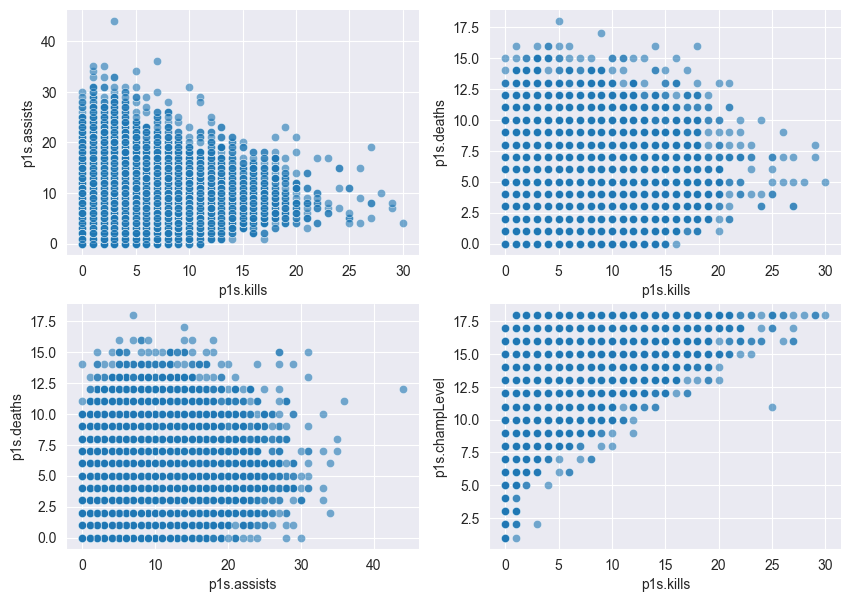

In [28]:
## Checking linearity between some key game performance features
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")

plt.subplot(2, 2, 1)
sns.scatterplot(data=dfc3, x='p1s.kills', y = 'p1s.assists', alpha = 0.6)
## plt.ylim(0, None)
## plt.xlim(0, None)

plt.subplot(2, 2, 2)
sns.scatterplot(data=dfc3, x='p1s.kills', y = 'p1s.deaths', alpha = 0.6)


plt.subplot(2, 2, 3)
sns.scatterplot(data=dfc3, x='p1s.assists', y = 'p1s.deaths', alpha = 0.6)

plt.subplot(2, 2, 4)
sns.scatterplot(data=dfc3, x='p1s.kills', y = 'p1s.champLevel', alpha = 0.6)

sns.despine()
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_xlabel'

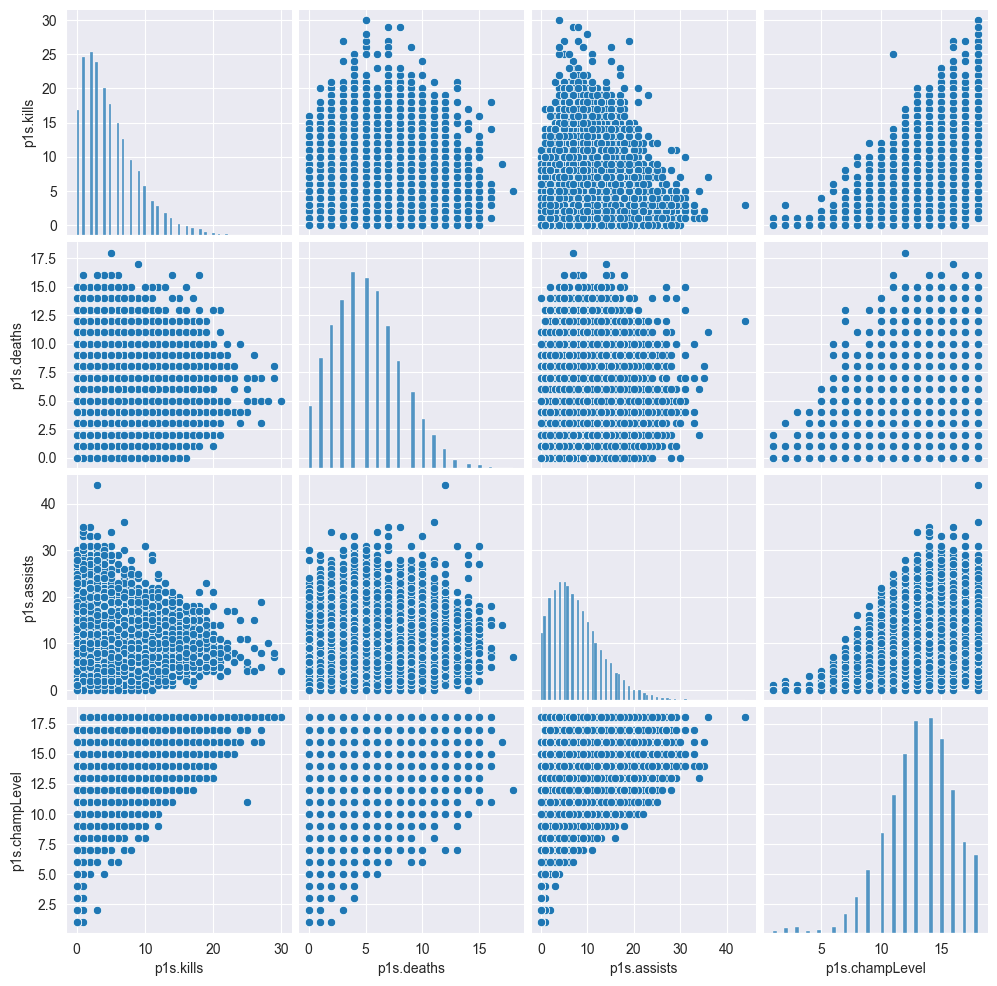

In [327]:
## A zoomed out view of feature-feature trends
## Not very linear trends but patterns appear expected e.g., more kills = generally less assists etc.
pair = sns.pairplot(dfc3[['p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.champLevel']])
plt.show()

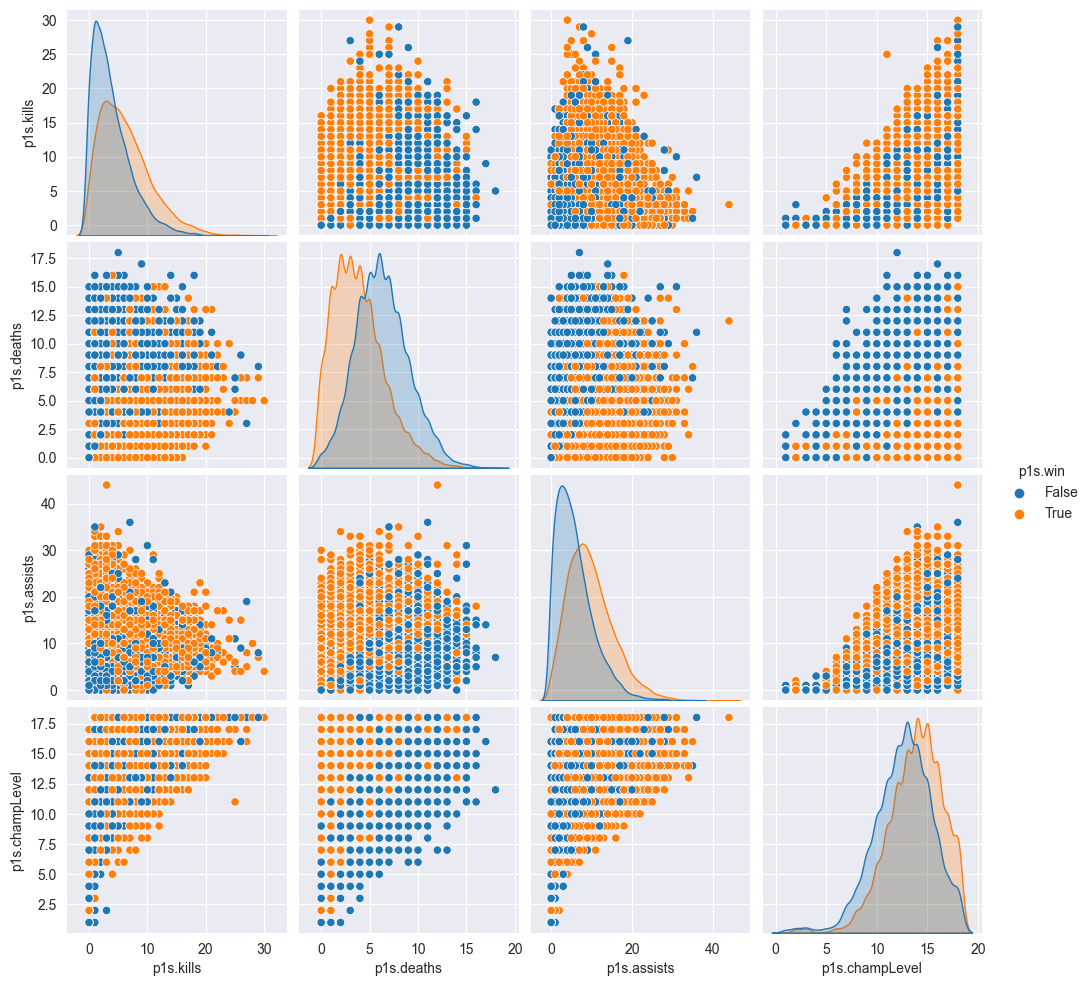

In [30]:
## looking at where wins lie, essentially wins with respect to k/d, k/a ratios etc.
## some relationships visually appearing through these pair plots
sns.pairplot(dfc3[['p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.champLevel', 'p1s.win']], hue = 'p1s.win')
plt.show()

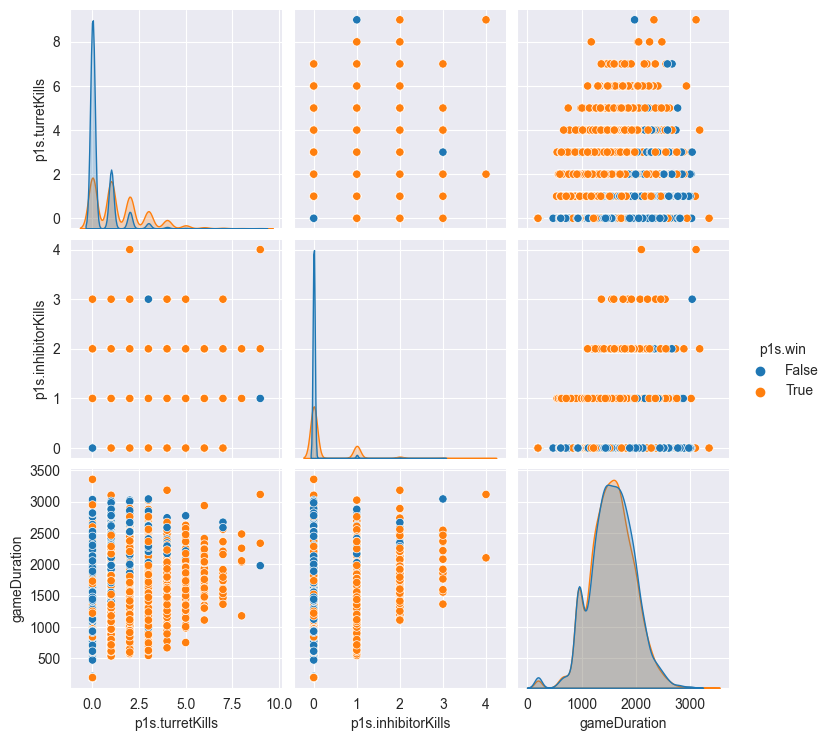

In [31]:
sns.pairplot(dfc3[['p1s.turretKills', 'p1s.inhibitorKills', 'gameDuration', 'p1s.win']], hue = 'p1s.win')
plt.show()

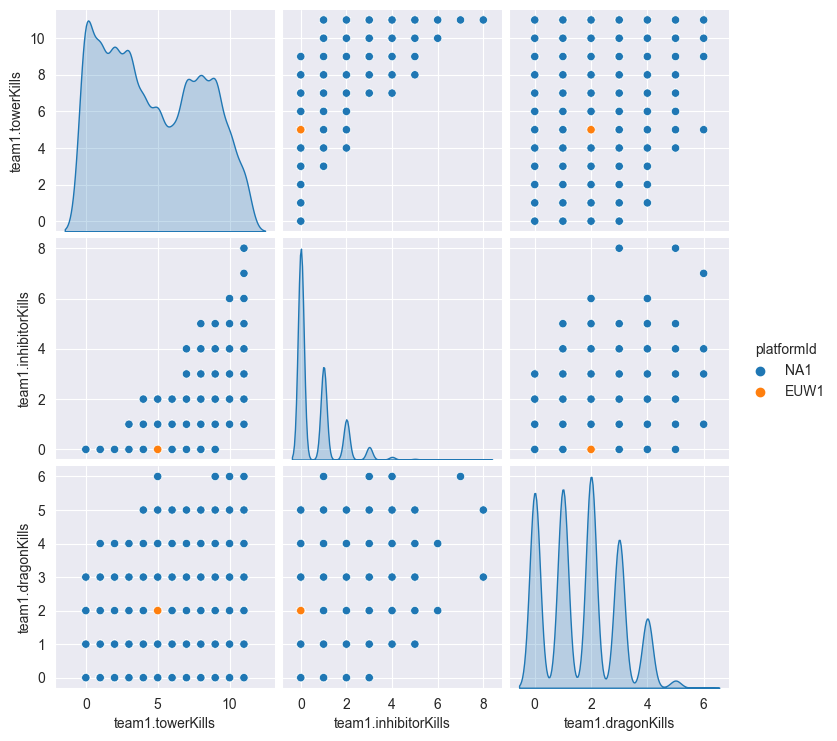

In [32]:
## looking at where wins lie, essentially wins with respect to k/d, k/a ratios etc.
## some relationships visually appearing through these pair plots
sns.pairplot(dfc3[['team1.towerKills', 'team1.inhibitorKills', 'team1.dragonKills', 'platformId', ]], hue = 'platformId')
plt.show()

In [33]:
dfc3['platformId'].value_counts()

NA1     16413
EUW1        1
Name: platformId, dtype: int64

In [34]:
dfc3 = dfc3.drop(columns = 'platformId') ## must drop this later on

# Dimensionality reduction techniques

### PCA

Commonly used for reducing dimensions while preserving as much information as possible using correlations between dimensions

In [35]:
dfc3.head(1)

,p1s.win,p1s.kills,p1s.deaths,p1s.assists,p1s.turretKills,p1s.inhibitorKills,p1s.champLevel,p1s.firstBloodKill,p1s.firstTowerKill,p1t.creepsPerMinDeltas.0-10,...,team2.firstInhibitor,team2.firstBaron,team2.firstDragon,team2.firstRiftHerald,team2.towerKills,team2.inhibitorKills,team2.baronKills,team2.dragonKills,team2.riftHeraldKills,gameDuration
0,True,4,4,7,2,0,14,False,False,0.5,...,False,False,False,False,1,0,0,1,0,1526


In [36]:
## Create X and y dataframes
dfc4 = dfc3.copy()

dfc4 = dfc4.dropna()
X = dfc4.copy()
X = X.drop(columns = ['team1.win', 'team2.win'])

win_bool = {'Win': 1, 'Fail' : 0}
y = dfc4['team1.win'].copy().map(win_bool)

In [37]:
## Before PCA we need to turn everything into cat codes for transformation
cat_cols = X.select_dtypes(['object']).columns

cat_cols

X[cat_cols] = X[cat_cols].astype('category')

X[cat_cols] = X[cat_cols].apply(lambda x: x.cat.codes)

In [38]:
## Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# X['pca-one'] = pca_result[:0]
# X['pca-two'] = pca_result[:1] 
# X['pca-three'] = pca_result[:2]

# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

In [40]:
len(pca_result)

16238

In [41]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,1.004815,-0.251447,-0.378173,-0.146518,0.922544,-0.337101,0.267740,-0.330039,-0.298075,-1.258331,...,-0.784269,-0.716173,-1.101849,-0.818677,-1.068322,-0.701645,-0.714662,-0.662202,-0.879705,-0.126107
1,-0.995208,-0.251447,0.306074,-0.876322,-0.738976,-0.337101,-1.249471,3.029945,-0.298075,-1.389281,...,-0.784269,-0.716173,0.907565,1.221483,-0.484735,-0.701645,-0.714662,0.098576,0.553346,-1.658760
2,1.004815,-0.251447,-1.062421,0.765737,-0.738976,-0.337101,-0.111562,-0.330039,-0.298075,-1.323806,...,-0.784269,-0.716173,-1.101849,-0.818677,-1.068322,-0.701645,-0.714662,-0.662202,-0.879705,-0.573673
3,-0.995208,-0.987961,-0.720297,-1.423675,-0.738976,-0.337101,-1.249471,-0.330039,-0.298075,0.738656,...,-0.784269,-0.716173,0.907565,1.221483,0.098852,-0.701645,-0.714662,0.098576,0.553346,-1.042056
4,-0.995208,0.730572,3.043063,2.955148,-0.738976,-0.337101,0.647043,-0.330039,-0.298075,-0.996431,...,1.275072,1.396310,0.907565,1.221483,1.557819,3.750174,0.893972,1.620133,1.986397,1.554868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16233,-0.995208,-0.742456,-0.036050,0.400835,-0.738976,-0.337101,-0.490865,-0.330039,-0.298075,-1.422019,...,1.275072,1.396310,-1.101849,-0.818677,0.974232,0.411309,0.893972,0.859354,0.553346,-0.256213
16234,1.004815,0.730572,0.990321,0.218384,0.922544,2.342216,1.026346,-0.330039,-0.298075,0.869606,...,-0.784269,-0.716173,0.907565,-0.818677,-0.484735,-0.701645,-0.714662,0.098576,-0.879705,0.357889
16235,1.004815,0.239563,-0.036050,0.948188,0.091784,-0.337101,0.647043,-0.330039,-0.298075,-1.389281,...,-0.784269,-0.716173,0.907565,-0.818677,-1.068322,-0.701645,-0.714662,0.859354,-0.879705,0.430749
16236,-0.995208,-0.496951,0.648198,-1.058773,-0.738976,-0.337101,-0.870168,-0.330039,-0.298075,-1.291069,...,1.275072,1.396310,0.907565,-0.818677,1.849613,1.524264,0.893972,0.859354,-0.879705,-0.339481


In [42]:
dfc3.shape

(16414, 125)

### t-SNE
A strategy more suited than PCA with reducing dimensions of high-dimension data + preserves local structure

In [43]:
## Create X and y dataframes
dfc4 = dfc3.copy()

dfc4 = dfc4.dropna()
X = dfc4.copy()
X = X.drop(columns = ['team1.win', 'team2.win'])

win_bool = {'Win': 1, 'Fail' : 0}
y = dfc4['team1.win'].copy().map(win_bool)

In [44]:
tsne = TSNE(n_components=2, perplexity = 300, verbose=1, random_state=123)
z = tsne.fit_transform(X)

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 16238 samples in 0.004s...
[t-SNE] Computed neighbors for 16238 samples in 10.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16238
[t-SNE] Computed conditional probabilities for sample 2000 / 16238
[t-SNE] Computed conditional probabilities for sample 3000 / 16238
[t-SNE] Computed conditional probabilities for sample 4000 / 16238
[t-SNE] Computed conditional probabilities for sample 5000 / 16238
[t-SNE] Computed conditional probabilities for sample 6000 / 16238
[t-SNE] Computed conditional probabilities for sample 7000 / 16238
[t-SNE] Computed conditional probabilities for sample 8000 / 16238
[t-SNE] Computed conditional probabilities for sample 9000 / 16238
[t-SNE] Computed conditional probabilities for sample 10000 / 16238
[t-SNE] Computed conditional probabilities for sample 11000 / 16238
[t-SNE] Computed conditional probabilities for sample 12000 / 16238
[t-SNE] Computed conditional probabilities for s

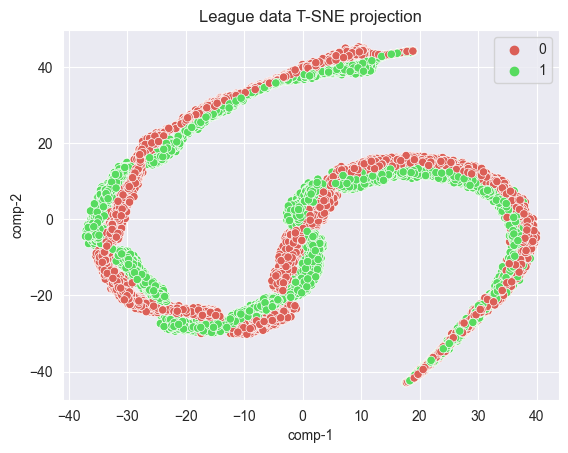

In [45]:
X = pd.DataFrame()
X["y"] = y
X["comp-1"] = z[:,0]
X["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=X.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=X).set(title="League data T-SNE projection")

plt.show()

In [46]:
X

,y,comp-1,comp-2
0,1,-11.421365,-26.282522
1,0,5.828871,43.171764
2,1,-35.574287,-3.592009
3,0,-19.785666,26.169994
4,0,27.839228,-26.629051
...,...,...,...
16409,0,-21.431837,-24.126183
16410,1,1.438124,6.629613
16411,1,7.560751,9.410331
16412,0,-27.988281,-21.434153


## Data prep without dim reduction

In [47]:
### Testing adding them more concisely
test_df = dfc3.copy() 

nums = []

for i in range(1,6):
    print(test_df[f'p{i}s.kills'][0].sum())
    nums.append(test_df[f'p{i}s.kills'][0].sum())

print(sum(nums))

4
1
2
12
6
25


In [48]:
### Testing function

# test_df['team1.kills'] = ''
# test_df['team2.kills'] = ''

# for n in range(len(test_df)):
#     nums = []
#     nums2 = []
#     for i in range(1,6):
#         nums.append(test_df[f'p{i}s.kills'][n].sum())
#     test_df['team1.kills'][n] = sum(nums)

#     for i in range(6,11):
#         nums2.append(test_df[f'p{i}s.kills'][n].sum())
#     test_df['team2.kills'][n] = sum(nums2)

#     test_df

### Totalling KDA metrics into team total scores

Summing team kills

In [328]:
def sum_kills(df):

    ''' Create empty columns for df to fill in '''
    df['team1.kills'] = ''
    df['team2.kills'] = ''

    ''' For every row of the column, create a fresh empty list of kills for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record numbers of kills for each participant of team 1 then total'''
        for i in range(1,6):
            nums.append(df[f'p{i}s.kills'][n].sum())
        df['team1.kills'][n] = sum(nums)

        ''' Record number of of kills for each participant of team 2 then total '''
        for i in range(6,11):
            nums2.append(df[f'p{i}s.kills'][n].sum())
        df['team2.kills'][n] = sum(nums2)

    ''' Drop the participant columns '''    
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.kills')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

test_df = dfc3.copy()
sum_kills(test_df)

,p1s.win,p1s.deaths,p1s.assists,p1s.turretKills,p1s.inhibitorKills,p1s.champLevel,p1s.firstBloodKill,p1s.firstTowerKill,p1t.creepsPerMinDeltas.0-10,p2s.win,...,team2.firstDragon,team2.firstRiftHerald,team2.towerKills,team2.inhibitorKills,team2.baronKills,team2.dragonKills,team2.riftHeraldKills,gameDuration,team1.kills,team2.kills
0,True,4,7,2,0,14,False,False,0.5,True,...,False,False,1,0,0,1,0,1526,25,12
1,False,6,3,0,0,10,True,False,0.1,False,...,True,True,3,0,0,2,1,937,11,22
2,True,2,12,0,0,13,False,False,0.3,True,...,False,False,1,0,0,1,0,1354,30,8
3,False,3,0,0,0,10,False,False,6.6,False,...,True,True,5,0,0,2,1,1174,6,24
4,False,14,24,0,0,15,False,False,1.3,False,...,True,True,10,4,1,4,2,2172,48,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16409,False,5,10,0,0,12,False,False,0.0,False,...,False,False,8,1,1,3,1,1476,18,29
16410,True,8,9,2,1,16,False,False,7.0,True,...,True,False,3,0,0,2,0,1712,31,25
16411,True,5,13,1,0,15,False,False,0.1,True,...,True,False,1,0,0,3,0,1740,40,30
16412,False,7,2,0,0,11,False,False,0.4,False,...,True,False,11,2,1,3,0,1444,9,32


In [334]:
dfc3[['p1s.kills','p2s.kills','p3s.kills', 'p4s.kills','p5s.kills']]

,p1s.kills,p2s.kills,p3s.kills,p4s.kills,p5s.kills
0,4,1,2,12,6
1,4,3,0,2,2
2,4,7,7,3,9
3,1,1,2,0,2
4,8,12,2,22,4
...,...,...,...,...,...
16409,2,6,7,2,1
16410,8,10,3,5,5
16411,6,11,8,10,5
16412,3,1,3,1,1


Summing deaths

In [50]:
def sum_deaths(df):

    ''' Create empty columns for df to fill in '''
    df['team1.deaths'] = ''
    df['team2.deaths'] = ''

    ''' For every row of the column, create a fresh empty list of deaths for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record numbers of deaths for each participant of team 1 then total'''
        for i in range(1,6):
            nums.append(df[f'p{i}s.deaths'][n].sum())
        df['team1.deaths'][n] = sum(nums)

        ''' Record number of of deaths for each participant of team 2 then total '''
        for i in range(6,11):
            nums2.append(df[f'p{i}s.deaths'][n].sum())
        df['team2.deaths'][n] = sum(nums2)

    ''' Drop the participant columns '''    
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.deaths')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

Summing assists

In [51]:
def sum_assists(df):

    ''' Create empty columns for df to fill in '''
    df['team1.assists'] = ''
    df['team2.assists'] = ''

    ''' For every row of the column, create a fresh empty list of assists for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record numbers of assists for each participant of team 1 then total'''
        for i in range(1,6):
            nums.append(df[f'p{i}s.assists'][n].sum())
        df['team1.assists'][n] = sum(nums)

        ''' Record number of of assists for each participant of team 2 then total '''
        for i in range(6,11):
            nums2.append(df[f'p{i}s.assists'][n].sum())
        df['team2.assists'][n] = sum(nums2)

    ''' Drop the participant columns '''
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.assists')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

In [52]:
def score_totals(df):

    ''' Summing up KDA metrics '''
    df = sum_kills(df)
    df = sum_deaths(df)
    df = sum_assists(df)

    return df

# test_df = dfc3.copy()
# score_totals(test_df)

In [53]:
test_df = dfc3.copy()

In [54]:
test_df.columns

Index(['p1s.win', 'p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.turretKills',
       'p1s.inhibitorKills', 'p1s.champLevel', 'p1s.firstBloodKill',
       'p1s.firstTowerKill', 'p1t.creepsPerMinDeltas.0-10',
       ...
       'team2.firstInhibitor', 'team2.firstBaron', 'team2.firstDragon',
       'team2.firstRiftHerald', 'team2.towerKills', 'team2.inhibitorKills',
       'team2.baronKills', 'team2.dragonKills', 'team2.riftHeraldKills',
       'gameDuration'],
      dtype='object', length=125)

### Combining objectives

Summing team level

In [55]:
def avg_level(df):

    ''' Create empty columns for df to fill in '''
    df['team1.mlevel'] = ''
    df['team2.mlevel'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record average champ levels for each team '''
        for i in range(1,6):
            nums.append(df[f'p{i}s.champLevel'][n].sum())
        df['team1.mlevel'][n] = sum(nums)

        for i in range(6,11):
            nums2.append(df[f'p{i}s.champLevel'][n].sum())
        df['team2.mlevel'][n] = sum(nums2)

    ''' Drop cols '''
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.champLevel')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

Summing tower kills

In [56]:
test_df = dfc3.copy()
test_df.columns

Index(['p1s.win', 'p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.turretKills',
       'p1s.inhibitorKills', 'p1s.champLevel', 'p1s.firstBloodKill',
       'p1s.firstTowerKill', 'p1t.creepsPerMinDeltas.0-10',
       ...
       'team2.firstInhibitor', 'team2.firstBaron', 'team2.firstDragon',
       'team2.firstRiftHerald', 'team2.towerKills', 'team2.inhibitorKills',
       'team2.baronKills', 'team2.dragonKills', 'team2.riftHeraldKills',
       'gameDuration'],
      dtype='object', length=125)

In [57]:
cols = test_df.columns
cols

Index(['p1s.win', 'p1s.kills', 'p1s.deaths', 'p1s.assists', 'p1s.turretKills',
       'p1s.inhibitorKills', 'p1s.champLevel', 'p1s.firstBloodKill',
       'p1s.firstTowerKill', 'p1t.creepsPerMinDeltas.0-10',
       ...
       'team2.firstInhibitor', 'team2.firstBaron', 'team2.firstDragon',
       'team2.firstRiftHerald', 'team2.towerKills', 'team2.inhibitorKills',
       'team2.baronKills', 'team2.dragonKills', 'team2.riftHeraldKills',
       'gameDuration'],
      dtype='object', length=125)

In [58]:
def total_turrets(df):

    ''' Create empty columns for df to fill in '''
    df['team1.turrets'] = ''
    df['team2.turrets'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record average champ levels for each team '''
        for i in range(1,6):
            nums.append(df[f'p{i}s.turretKills'][n].sum())
        df['team1.turrets'][n] = sum(nums)

        for i in range(6,11):
            nums2.append(df[f'p{i}s.turretKills'][n].sum())
        df['team2.turrets'][n] = sum(nums2)

    ''' Drop cols '''
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.turretKills')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

In [59]:
# total_turrets(test_df)

Summing inhib kills

In [60]:
def total_inhibs(df):

    ''' Create empty columns for df to fill in '''
    df['team1.inhibs'] = ''
    df['team2.inhibs'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record average champ levels for each team '''
        for i in range(1,6):
            nums.append(df[f'p{i}s.inhibitorKills'][n].sum())
        df['team1.inhibs'][n] = sum(nums)

        for i in range(6,11):
            nums2.append(df[f'p{i}s.inhibitorKills'][n].sum())
        df['team2.inhibs'][n] = sum(nums2)

    ''' Drop cols '''
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}s.inhibitorKills')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

In [61]:
# total_inhibs(test_df)

Summing creep score

In [62]:
def total_cspm(df):

    ''' Create empty columns for df to fill in '''
    df['team1.cspm'] = ''
    df['team2.cspm'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):
        nums = []   
        nums2 = []

        ''' Record average cs score for each team '''
        for i in range(1,6):
            nums.append(df[f'p{i}t.creepsPerMinDeltas.0-10'][n].sum())
        df['team1.cspm'][n] = sum(nums)

        for i in range(6,11):
            nums2.append(df[f'p{i}t.creepsPerMinDeltas.0-10'][n].sum())
        df['team2.cspm'][n] = sum(nums2)

    ''' Drop cols '''
    drop_cols = []

    for i in range(1,11):
        drop_cols.append(f'p{i}t.creepsPerMinDeltas.0-10')

    for feat in drop_cols:
        df = df.drop(columns = feat)

    return df

In [63]:
# test_df = dfc3.copy()
# total_cspm(test_df)

In [64]:
def total_objectives(df):

    ''' Objective scores '''
    df = total_turrets(df)
    df = total_inhibs(df)
    df = total_cspm(df)

    return df

### Creating difference cols

Differences will be between team 1 and team 2 - team 1 with respect to team 2

E.g., if Team1 has 5 total turret kills and Team2 has 1, the difference will be 4

In [65]:
def object_diff(df):

    ''' Differences for major objectives '''
    df['towerDiff'] = ''
    df['inhibDiff'] = ''
    df['dragDiff'] = ''
    df['heraldDiff'] = ''
    df['baronDiff'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):

        ''' Calculate difference '''
        df['towerDiff'] = df['team1.turrets'] - df['team2.turrets']
        df['inhibDiff'] = df['team1.inhibs'] - df['team2.inhibs']
        df['dragDiff'] = df['team1.dragonKills'] - df['team2.dragonKills']
        df['heraldDiff'] = df['team1.riftHeraldKills'] - df['team2.riftHeraldKills']
        df['baronDiff'] = df['team1.baronKills'] - df['team2.baronKills']
    
    return df

In [66]:
def score_diff(df):

    ''' All score objectives '''
    df['killDiff'] = ''
    df['deathsDiff'] = ''
    df['assistDiff'] = ''
    df['csDiff'] = ''

    ''' Create fresh empty list for each team '''
    for n in range(len(df)):

        ''' Calculate difference '''
        df['killDiff'] = df['team1.kills'] - df['team2.kills']
        df['deathsDiff'] = df['team1.deaths'] - df['team2.deaths']
        df['assistDiff'] = df['team1.assists'] - df['team2.assists']
        df['csDiff'] = df['team1.cspm'] - df['team2.cspm']
    
    return df

### Penalise by game duration

In [210]:
def duration_pen(df):

    ''' Just test on kills for now '''
    df['killAdj'] = ''
    df['assistAdj'] = ''
    df['deathAdj'] = ''
    df['csAdj'] = ''
    df['towerAdj'] = ''
    


    for n in range(len(df)):
        df['killAdj'] = (df['killDiff'] / df['gameDuration']) + 10
        df['deathAdj'] = (df['deathsDiff'] / df['gameDuration']) + 10
        df['assistAdj'] = (df['assistDiff']) / df['gameDuration'] + 10
        df['csAdj'] = (df['csDiff']) / df['gameDuration'] + 10
        df['towerAdj'] = (df['towerDiff']) / df['gameDuration'] + 10

    return df

# test_df = clean_df.copy()
# duration_pen(test_df)

# Narrowing our columns through RegEx

## Building blocks

In [68]:
### function for narrowing down the columns

def key_cols(df):

    ''' Prioritising key columns using RegEx '''
    regex = re.compile(r'\w+\d+\.+\w+\.+kills|\w+\d+\.+\w+\.+deaths|\w+\d+\.+\w+\.+assists|\w+\d+\.+\w+\.+turretKills|\w+\d+\.+\w+\.+inhibitorKills|\w+\d+\.+\w+\.+firstBloodKill|\
    |\w+\d+\.+\w+\.+firstTowerKill|\w+\d+\.+\w+\.+champLevel|\w+\d+.\w+.creepsPerMinDeltas.\d+|\w+\d+\.+\w+\.+win|team.+\d+\.+\w+')                               

    ''' Anything matching will be added to the list '''
    filtered_cols = [i for i in df.columns if regex.match(i)]

    filtered_cols.append('gameDuration')
    filtered_cols.append('platformId')

    df = df[filtered_cols]

    return df

In [69]:
def bye_cols(df):

    ''' Filtering out less relevant or irrelevant game metrics '''
    regex = re.compile(r'\w+\d+\.+\w+\.+\w+\.+10-20|\w+\d+\.+\w+\.+\w+\.+20-30|\w+\d+\.+\w+\.+\w+\.+30-end|.+vilemaw\w+|.+dominion\w+')                               
    keep_cols = [i for i in df.columns if not regex.match(i)]

    df = df[keep_cols]
    
    return df

In [70]:

def name_clean(df):

    ''' Turning columns into more manageable names for downstream operations '''

    feat_cols = []

    for feat in df.columns:
        for i in range(1,11):
            feat = re.sub(f'participant{i}.stats' , f'p{i}s', feat)
            feat = re.sub(f'participant{i}.timeline' , f'p{i}t', feat)

        feat = re.sub('teamId_100', 'team1', feat)
        feat = re.sub('teamId_200', 'team2', feat)
        feat_cols.append(feat)

    df.columns = feat_cols

    return df

## The sweep

In [208]:
def sweep_columns(df):

    ''' Bringing it all together '''
    df = key_cols(df)
    df = bye_cols(df)
    df = name_clean(df)

    ''' drop this useless column '''
    df = df.drop(columns = 'platformId')

    return df

small_df = df.copy()
small_df = sweep_columns(small_df)

In [92]:
small_df.head()

,p1s.win,p1s.kills,p1s.deaths,p1s.assists,p1s.turretKills,p1s.inhibitorKills,p1s.champLevel,p1s.firstBloodKill,p1s.firstTowerKill,p1t.creepsPerMinDeltas.0-10,...,team2.firstInhibitor,team2.firstBaron,team2.firstDragon,team2.firstRiftHerald,team2.towerKills,team2.inhibitorKills,team2.baronKills,team2.dragonKills,team2.riftHeraldKills,gameDuration
0,True,4,4,7,2,0,14,False,False,0.5,...,False,False,False,False,1,0,0,1,0,1526
1,False,4,6,3,0,0,10,True,False,0.1,...,False,False,True,True,3,0,0,2,1,937
2,True,4,2,12,0,0,13,False,False,0.3,...,False,False,False,False,1,0,0,1,0,1354
3,False,1,3,0,0,0,10,False,False,6.6,...,False,False,True,True,5,0,0,2,1,1174
4,False,8,14,24,0,0,15,False,False,1.3,...,True,True,True,True,10,4,1,4,2,2172


# Feature engineering

In [211]:
def everything(df):

    ''' Combining all participant data into team data'''
    df = score_totals(df)
    df = avg_level(df)
    df = total_objectives(df)
    df = df.dropna()

    ''' Calculate all differences in summed metrics '''
    df = object_diff(df) ### did not seem realistic to predict based on total kills
    df = score_diff(df)  ### we are comparing between 2 teams, so a difference should represent that comparison

    ''' Penalisations by game durations '''

    df = duration_pen(df)

    ''' Remove remaining participant columns'''
    regex = re.compile(r'p\d+')
    ## if there is a match, then the list will contain it
    keep_cols = [i for i in df.columns if not regex.match(i)]    
    df = df[keep_cols]

    ''' Map boolean values onto win and fail for winning'''
    win_bool = {'Win': 1, 'Fail' : 0}
    df['team1.win'] = df['team1.win'].map(win_bool)

    ''' We only need to know if 1 team won to know if the other team won'''
    df = df.drop(columns = 'team2.win')

    return df

clean_df = small_df.copy()
clean_df = everything(clean_df)

In [212]:
clean_df.shape

(16238, 52)

In [335]:
clean_df

,team1.win,team1.firstBlood,team1.firstTower,team1.firstInhibitor,team1.firstBaron,team1.firstDragon,team1.firstRiftHerald,team1.towerKills,team1.inhibitorKills,team1.baronKills,...,baronDiff,killDiff,deathsDiff,assistDiff,csDiff,killAdj,assistAdj,deathAdj,csAdj,towerAdj
0,1,False,True,False,False,True,True,5,0,0,...,0,13,-13,25,-2.3,10.008519,10.016383,9.991481,9.998493,10.002621
1,0,True,False,False,False,False,False,0,0,0,...,0,-11,11,-11,-2.4,9.98826,9.98826,10.01174,9.997439,9.996798
2,1,True,True,False,False,True,True,6,0,0,...,0,22,-22,35,1.4,10.016248,10.025849,9.983752,10.001034,10.003693
3,0,False,False,False,False,False,False,0,0,0,...,0,-18,18,-30,-3.5,9.984668,9.974446,10.015332,9.997019,9.995741
4,0,False,False,False,False,False,False,2,0,1,...,0,-2,2,3,-3.8,9.999079,10.001381,10.000921,9.99825,9.996317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16409,0,True,True,False,False,True,True,3,0,0,...,-1,-11,11,-32,-2.3,9.992547,9.97832,10.007453,9.998442,9.996612
16410,1,False,True,True,True,False,False,7,1,1,...,1,6,-6,17,-1.6,10.003505,10.00993,9.996495,9.999065,10.002336
16411,1,True,True,True,True,False,True,7,1,1,...,1,10,-10,10,0.5,10.005747,10.005747,9.994253,10.000287,10.003448
16412,0,True,False,False,False,False,False,0,0,0,...,-1,-23,23,-27,-3.5,9.984072,9.981302,10.015928,9.997576,9.993075


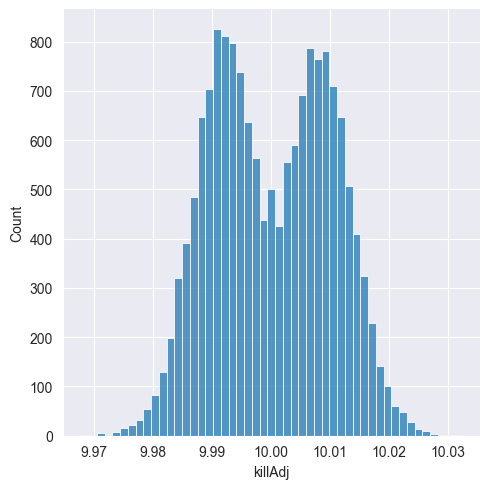

In [94]:
## Comparing distribution before and after
sns.displot(clean_df['killAdj'])
plt.show()

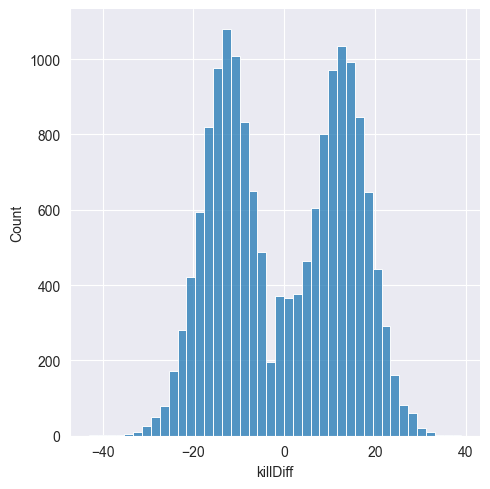

In [95]:
## Distribution appears pretty similar after transformation!
sns.displot(clean_df['killDiff'])
plt.show()

In [96]:
test_df = clean_df.copy()

In [97]:
clean_df.columns

Index(['team1.win', 'team1.firstBlood', 'team1.firstTower',
       'team1.firstInhibitor', 'team1.firstBaron', 'team1.firstDragon',
       'team1.firstRiftHerald', 'team1.towerKills', 'team1.inhibitorKills',
       'team1.baronKills', 'team1.dragonKills', 'team1.riftHeraldKills',
       'team2.firstBlood', 'team2.firstTower', 'team2.firstInhibitor',
       'team2.firstBaron', 'team2.firstDragon', 'team2.firstRiftHerald',
       'team2.towerKills', 'team2.inhibitorKills', 'team2.baronKills',
       'team2.dragonKills', 'team2.riftHeraldKills', 'gameDuration',
       'team1.kills', 'team2.kills', 'team1.deaths', 'team2.deaths',
       'team1.assists', 'team2.assists', 'team1.mlevel', 'team2.mlevel',
       'team1.turrets', 'team2.turrets', 'team1.inhibs', 'team2.inhibs',
       'team1.cspm', 'team2.cspm', 'towerDiff', 'inhibDiff', 'dragDiff',
       'heraldDiff', 'baronDiff', 'killDiff', 'deathsDiff', 'assistDiff',
       'csDiff', 'killAdj', 'assistAdj', 'deathAdj', 'csAdj'],
      dtyp

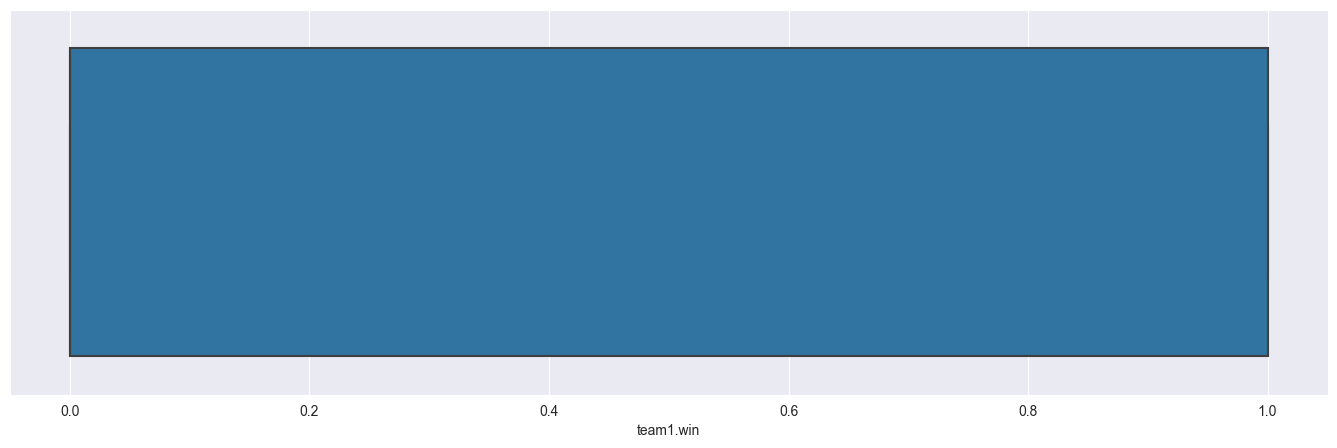

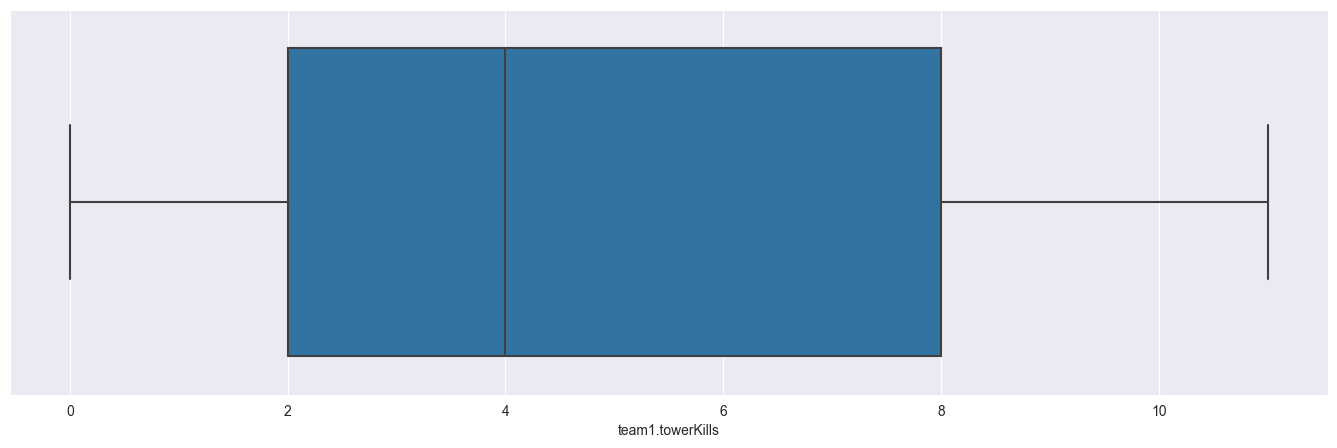

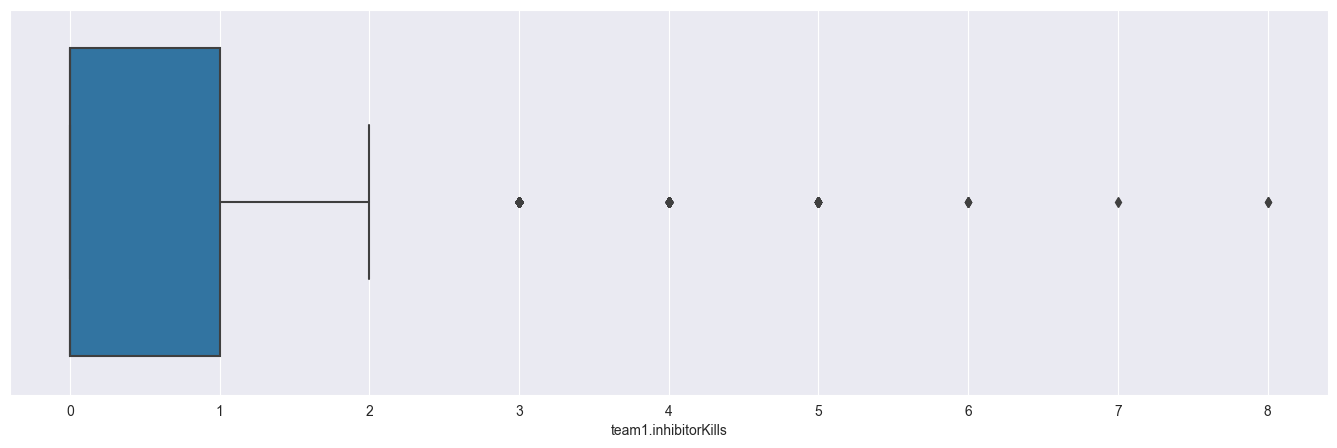

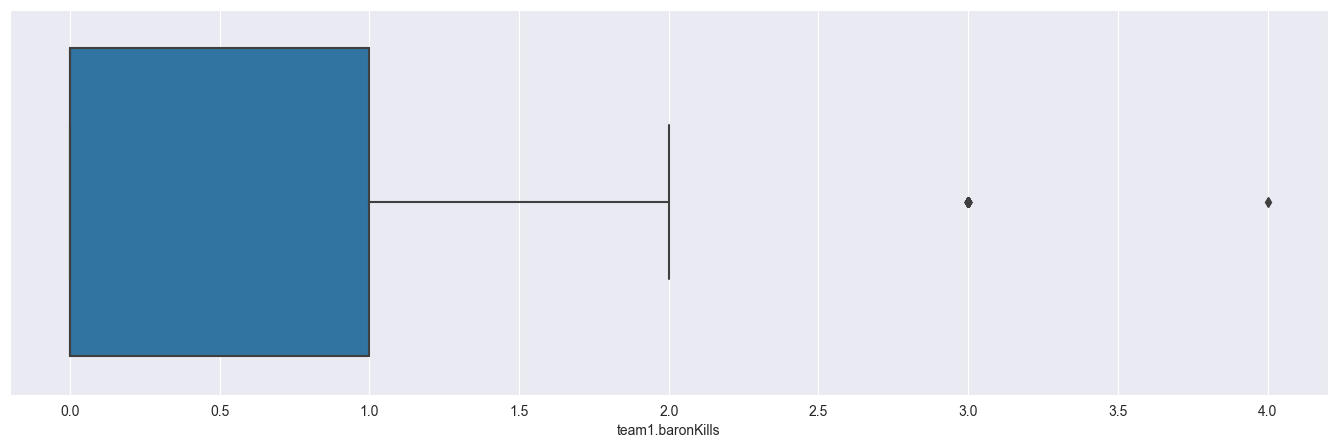

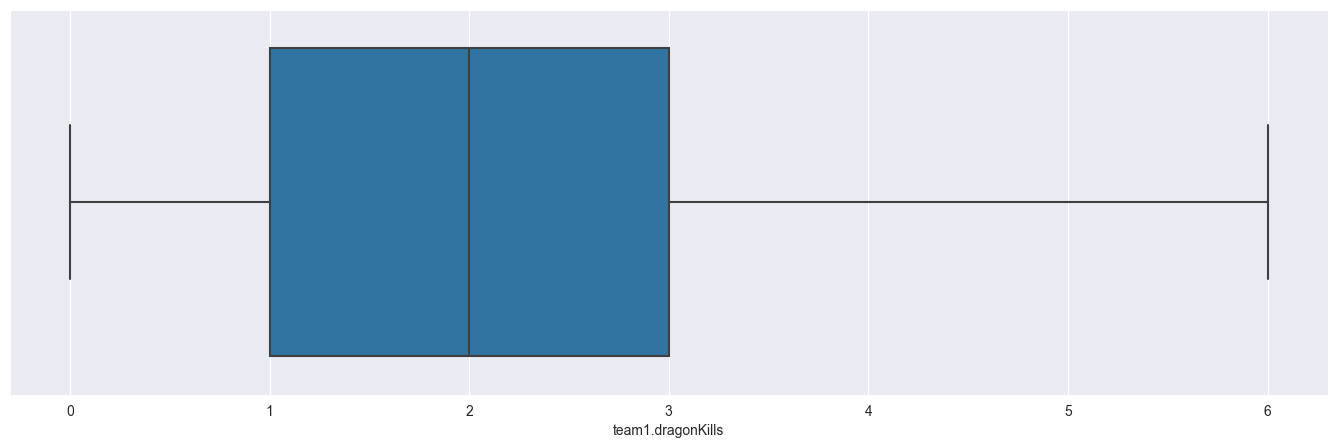

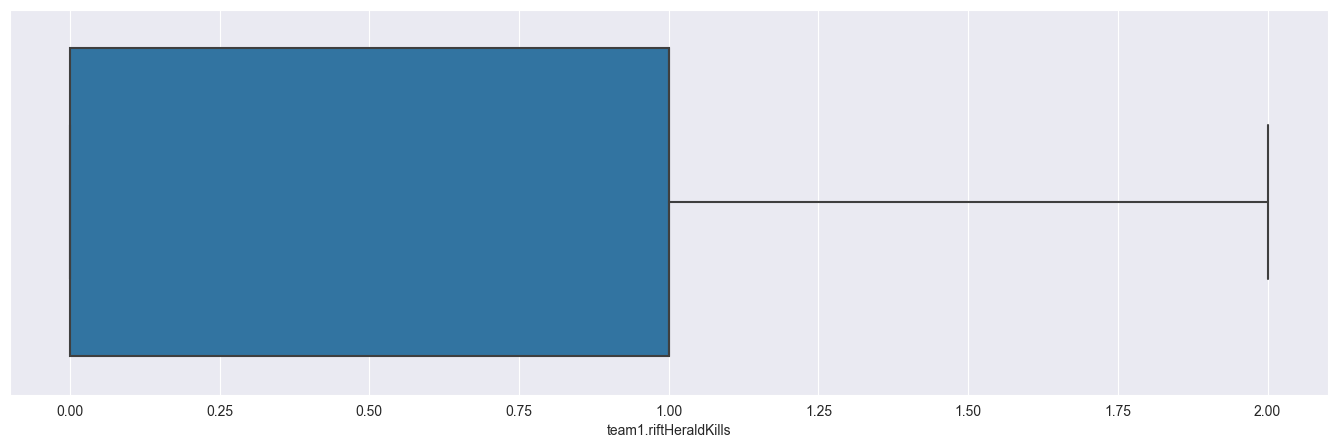

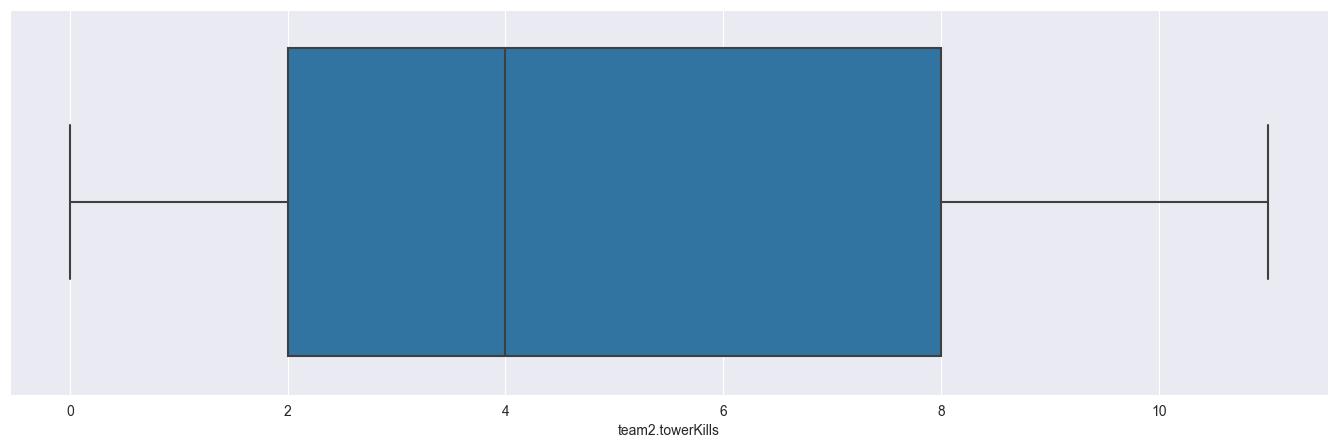

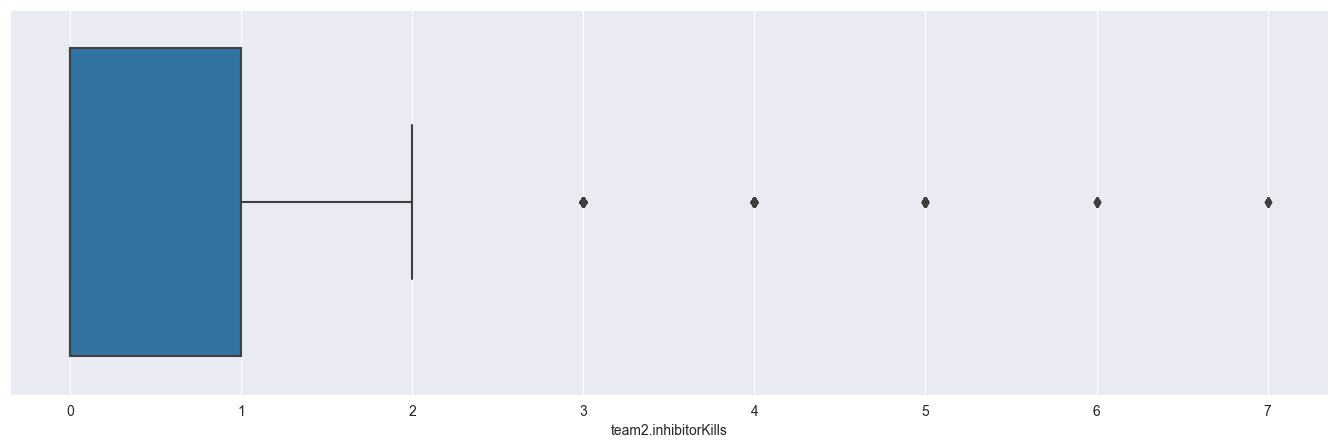

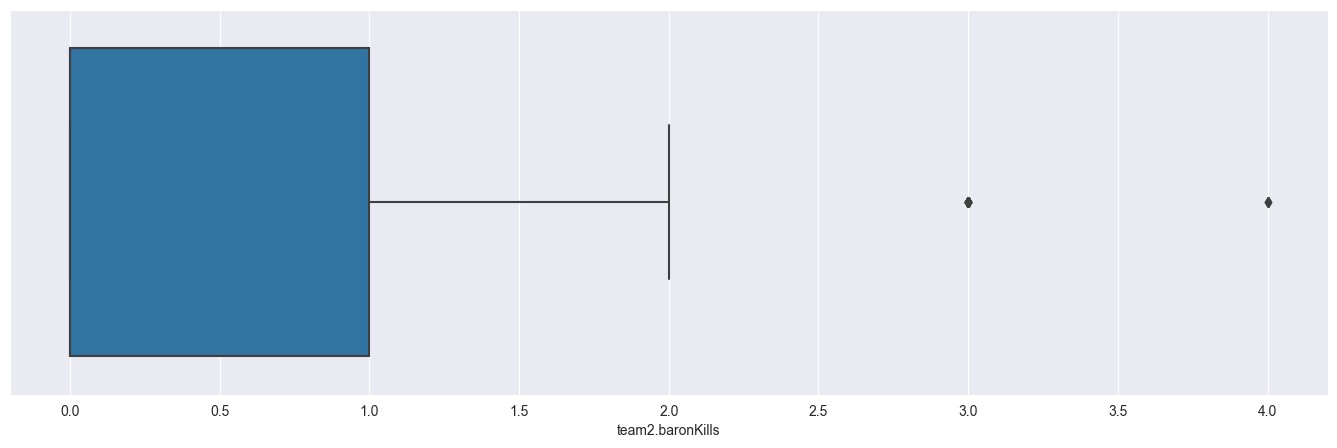

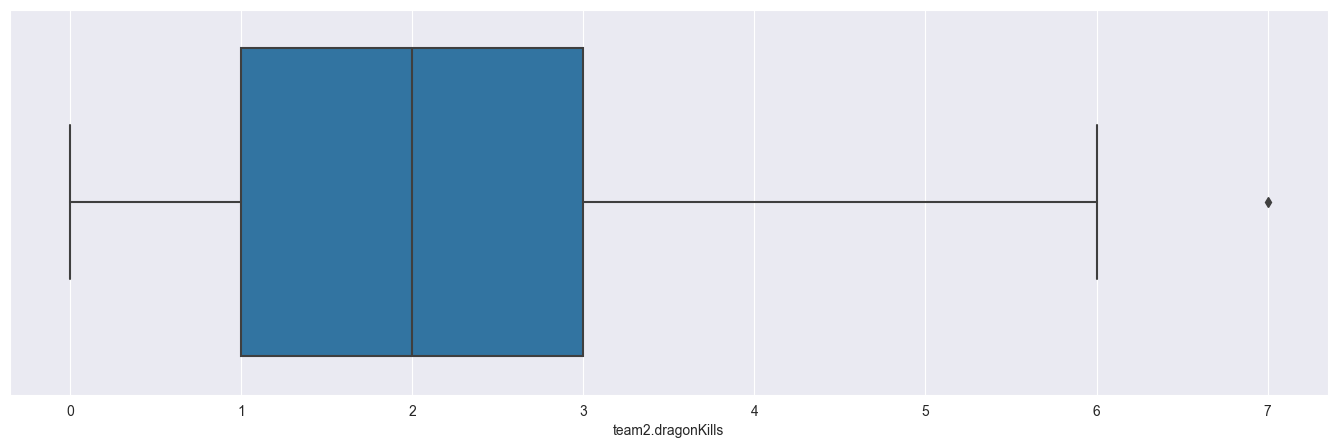

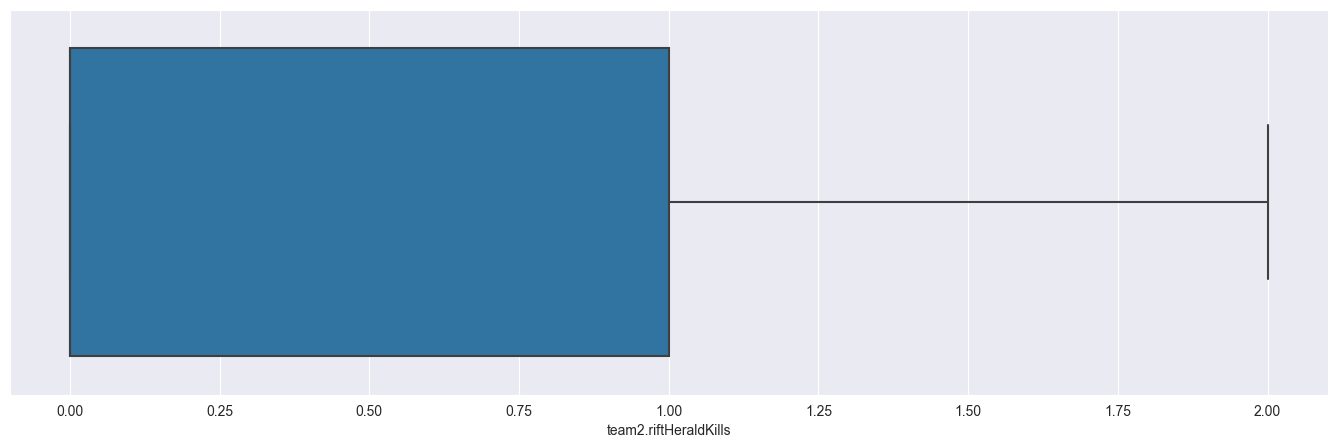

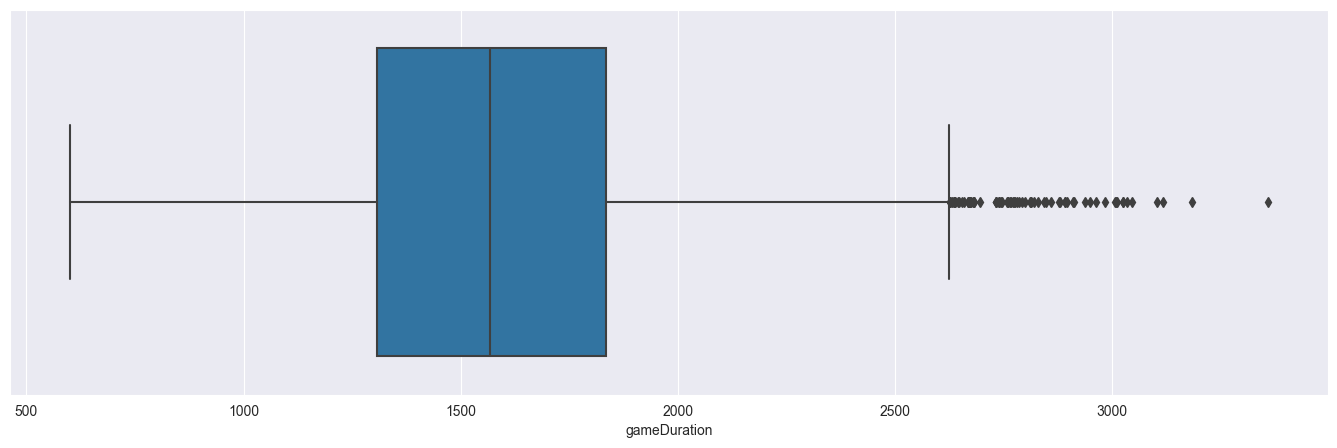

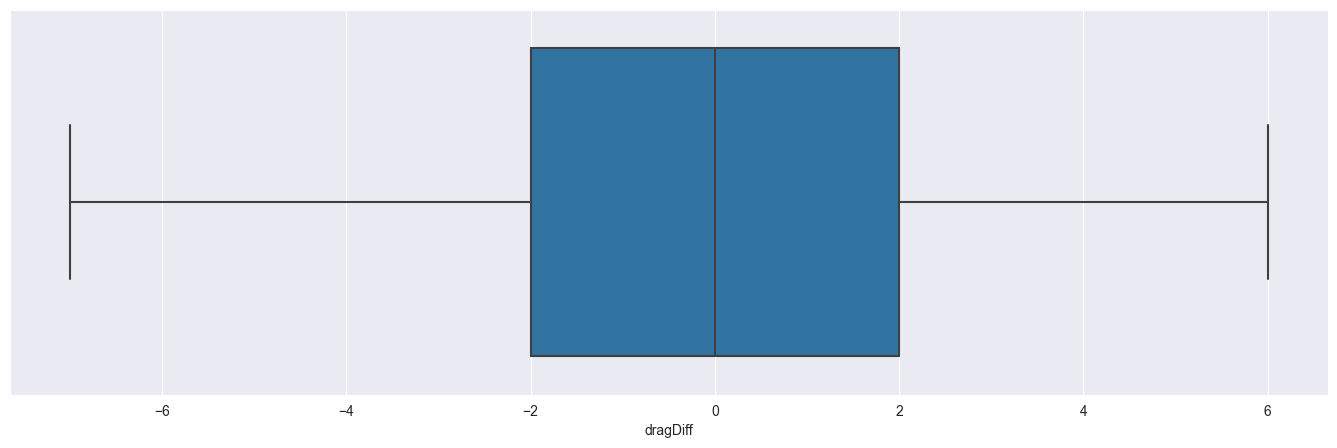

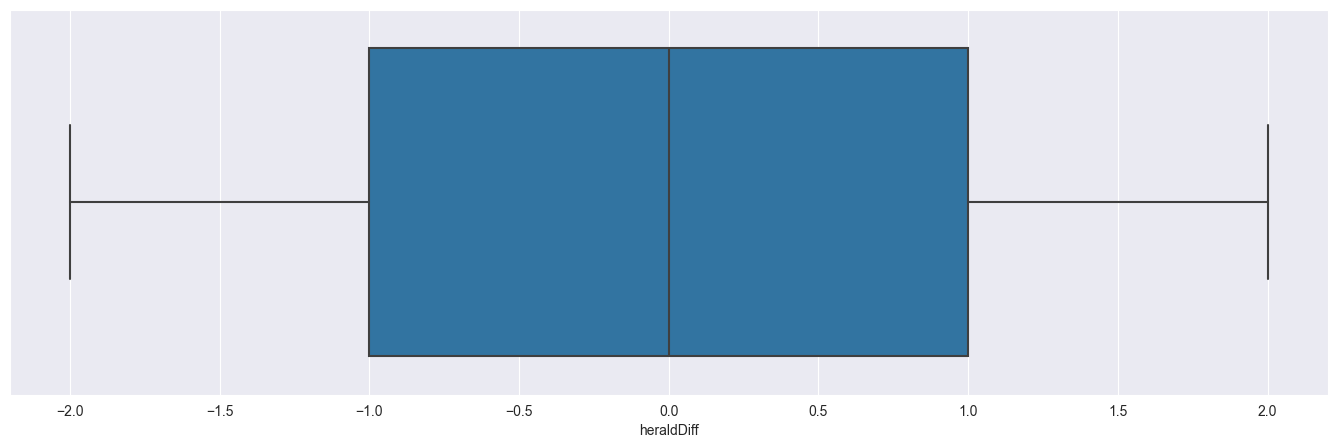

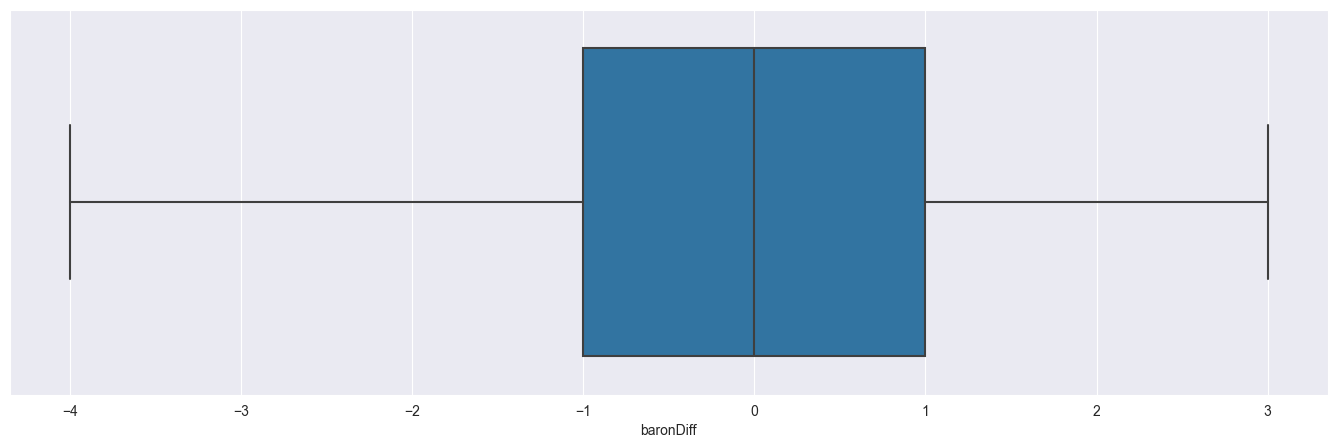

In [198]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = test_df.select_dtypes(include=numerics) # in case we want to narrow it down to numerical columns specfically

# Boxplot per numerical column
for column in num_df:
        plt.figure(figsize=(17,5))
        sns.boxplot(data=num_df, x=column)

plt.show()

# Some data are super leaning towards one side - many many outliers

In [99]:
## Inhibitor kills outliers
clean_df = clean_df.drop(clean_df[clean_df['team1.inhibitorKills'] > 4].index)
clean_df = clean_df.drop(clean_df[clean_df['team2.inhibitorKills'] > 4].index)

## Baron kills outliers
clean_df = clean_df.drop(clean_df[clean_df['team1.baronKills'] > 3].index)
clean_df = clean_df.drop(clean_df[clean_df['team2.baronKills'] > 3].index)

## Game duration outliers
clean_df = clean_df.drop(clean_df[clean_df['gameDuration']> 2750].index)

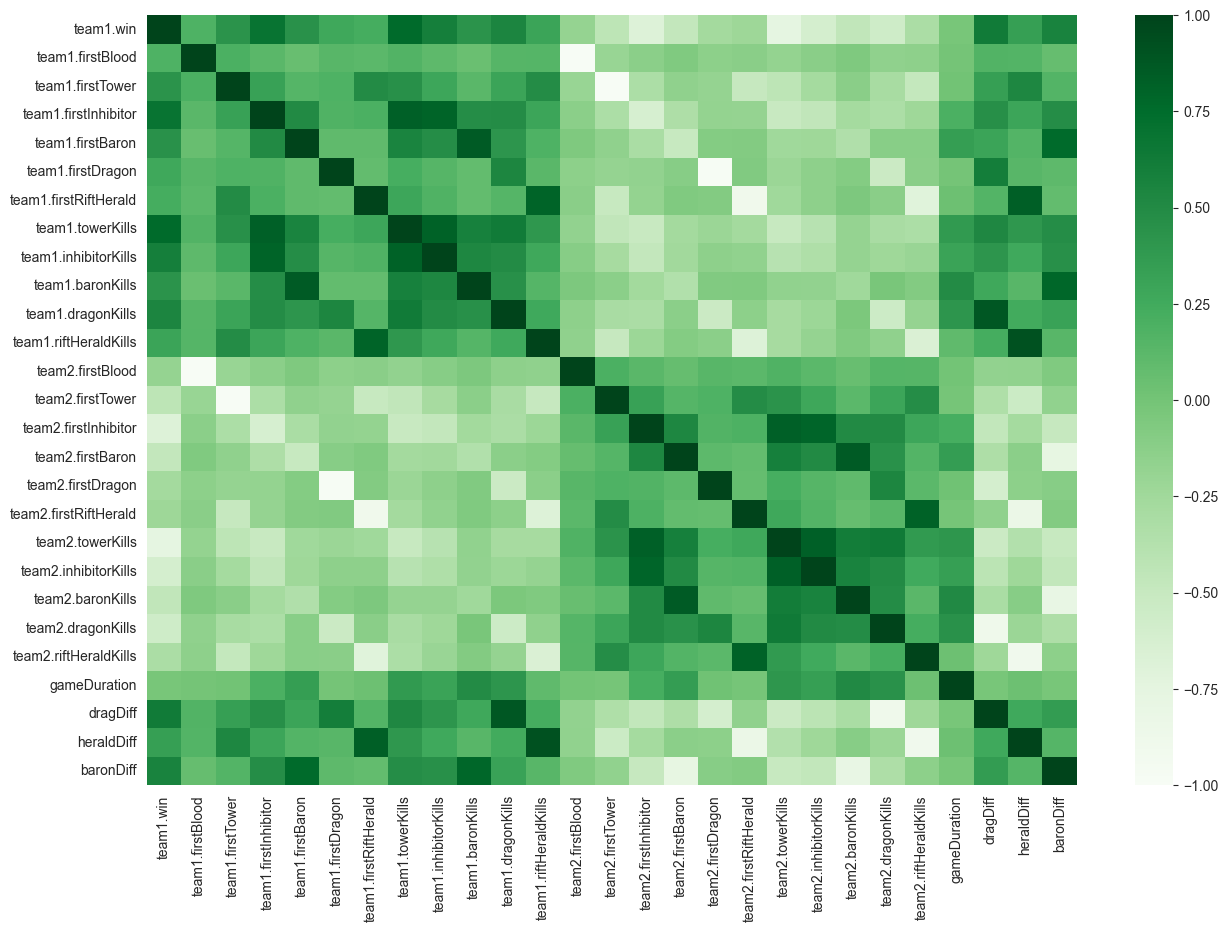

In [339]:
plt.figure(figsize=(15,10))
sns.heatmap(clean_df.corr(),annot=False,cmap='Greens')
plt.show()

## So many correlations between features 

# Test train split

In [104]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Accuracy precision recall and F1 score function

In [105]:

def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

# LogReg

## All feats 99.29%

In [106]:
### Returns confusion matrix for the logistic regression and other metrics

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(confusion_matrix(predicted, actual), "\n")
    print(f"The accuracy of your model is: {accuracy(predicted,actual)}')")
    print(f"The recall of your model is: {recall(predicted,actual)}')")
    print(f"The precision of your model is: {precision(predicted,actual)}')")
    print(f"The F1 score of your model is: {f1(predicted,actual)}')")

In [336]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

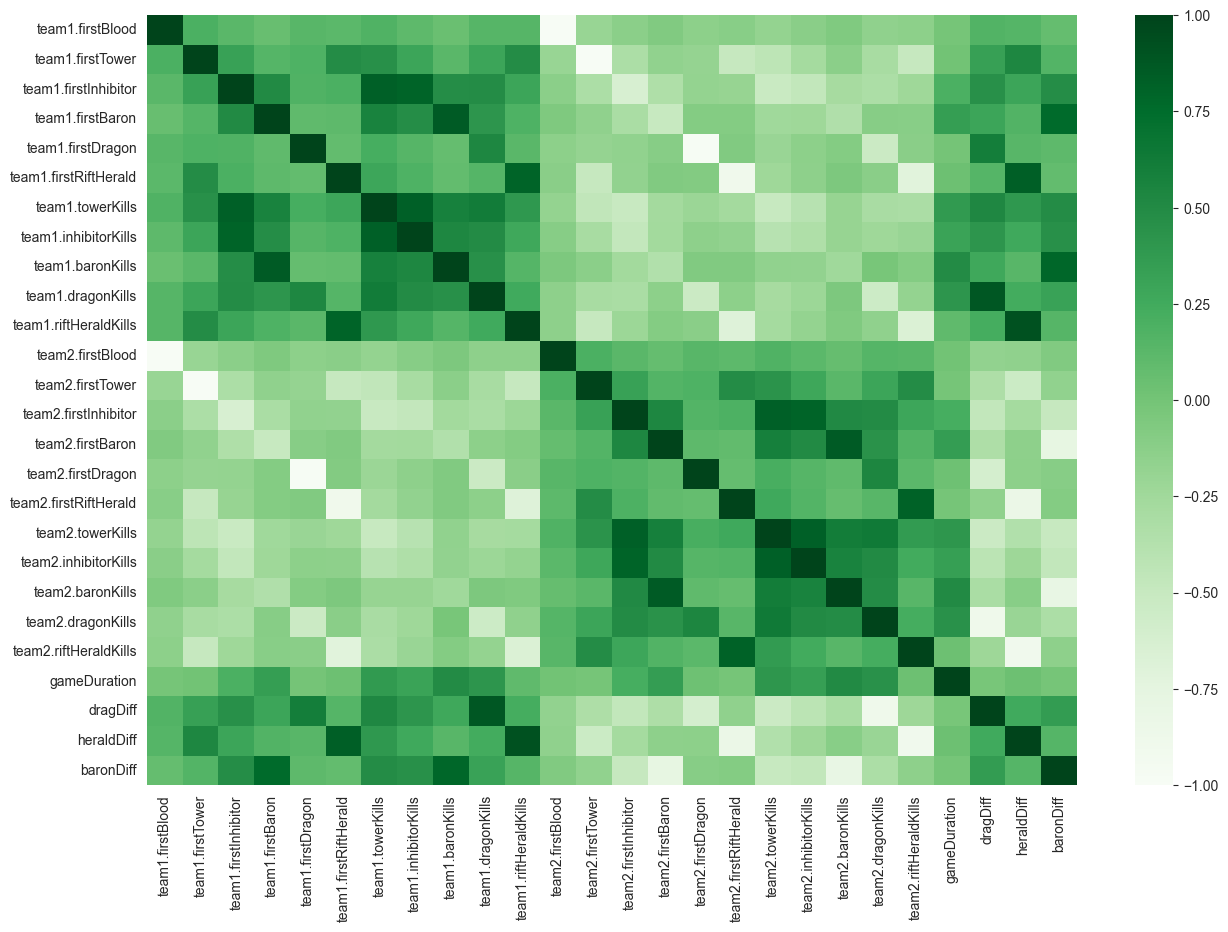

In [337]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=False,cmap='Greens')
plt.show()

## Remove multicolinearities logically

In [110]:
### Fit the logistic regression on the TRAINING data not the testing data

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [111]:
### Create columns on training data based on logistic regression model trained with training data

X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

In [112]:
### Metrics for TRAINING DATA

X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)

get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[6404   52]
 [  64 6381]] 

The accuracy of your model is: 0.9910084489574451')
The recall of your model is: 0.9900698215671063')
The precision of your model is: 0.9919166796207057')
The F1 score of your model is: 0.9909923901226898')


In [113]:
y_train[0:5]

9530     0
4938     0
16359    0
15560    1
6690     1
Name: team1.win, dtype: int64

In [114]:
X_train.head(5)

,team1.firstBlood,team1.firstTower,team1.firstInhibitor,team1.firstBaron,team1.firstDragon,team1.firstRiftHerald,team1.towerKills,team1.inhibitorKills,team1.baronKills,team1.dragonKills,...,deathsDiff,assistDiff,csDiff,killAdj,assistAdj,deathAdj,csAdj,prob_lose,prob_win,y_pred
9530,True,False,False,False,True,False,0,0,0,1,...,8,-16,-1.5,9.9936,9.9872,10.0064,9.9988,9.989380e-01,0.001062,0
4938,False,True,False,False,False,False,2,0,0,2,...,17,-31,-4.0,9.991247,9.983042,10.0093,9.997812,9.999986e-01,0.000001,0
16359,True,True,False,False,False,False,3,0,0,0,...,13,-6,2.5,9.993394,9.996951,10.006606,10.00127,9.999633e-01,0.000037,0
15560,True,False,True,False,False,False,10,2,1,4,...,-30,88,1.3,10.016181,10.047465,9.983819,10.000701,3.172116e-09,1.000000,1
6690,True,True,False,False,False,True,4,0,0,2,...,-14,17,-3.0,10.011935,10.014493,9.988065,9.997442,1.166167e-03,0.998834,1


## 3 features 71.52%

In [115]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [117]:
mod_cols = ['team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

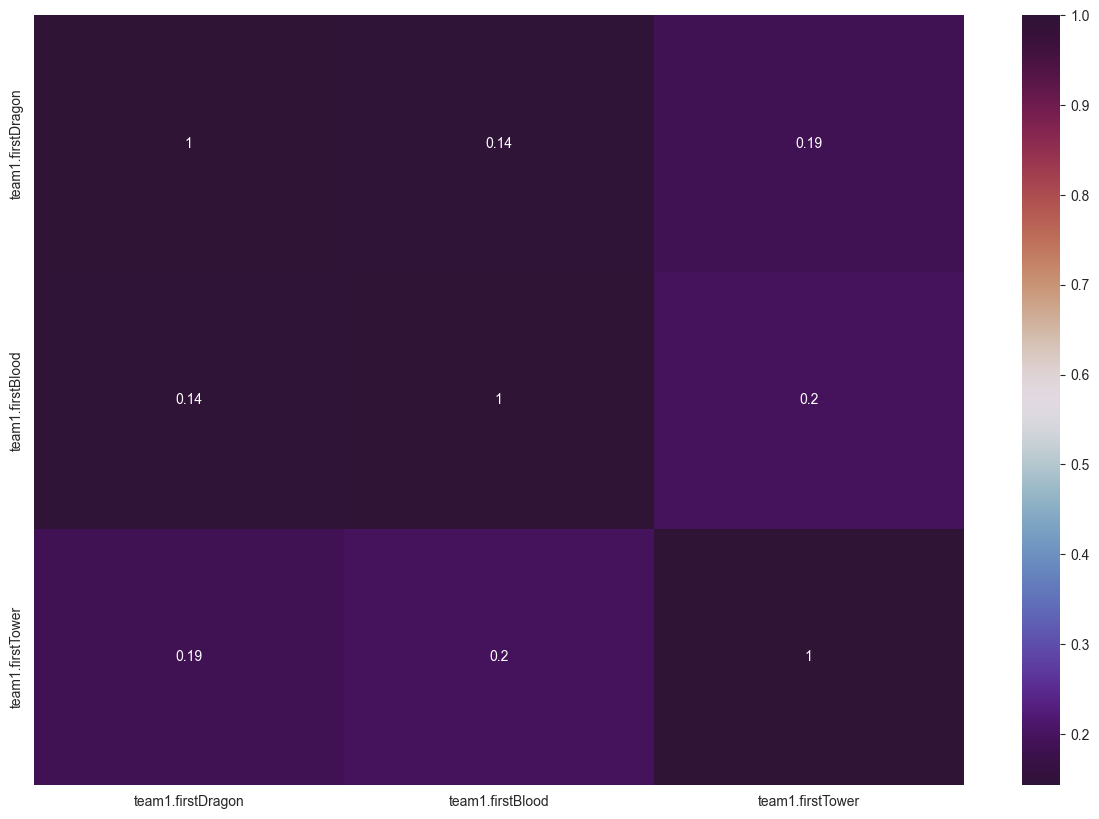

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='twilight_shifted')
plt.show()

## Remove multicolinearities logically

In [119]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

In [120]:
### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[4447 1644]
 [2021 4789]] 

The accuracy of your model is: 0.7159134950779009')
The recall of your model is: 0.7032305433186491')
The precision of your model is: 0.7444427172392352')
The F1 score of your model is: 0.7232500188778979')


In [121]:
X_train

,team1.firstDragon,team1.firstBlood,team1.firstTower,prob_lose,prob_win,y_pred
9530,True,True,False,0.546604,0.453396,0
4938,False,False,True,0.459082,0.540918,1
16359,False,True,True,0.354722,0.645278,1
15560,False,True,False,0.752710,0.247290,0
6690,False,True,True,0.354722,0.645278,1
...,...,...,...,...,...,...
13647,False,False,False,0.824542,0.175458,0
5482,True,True,False,0.546604,0.453396,0
879,False,False,True,0.459082,0.540918,1
16074,False,True,False,0.752710,0.247290,0


## 4 features 71.53%

In [122]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [124]:
mod_cols = ['gameDuration', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

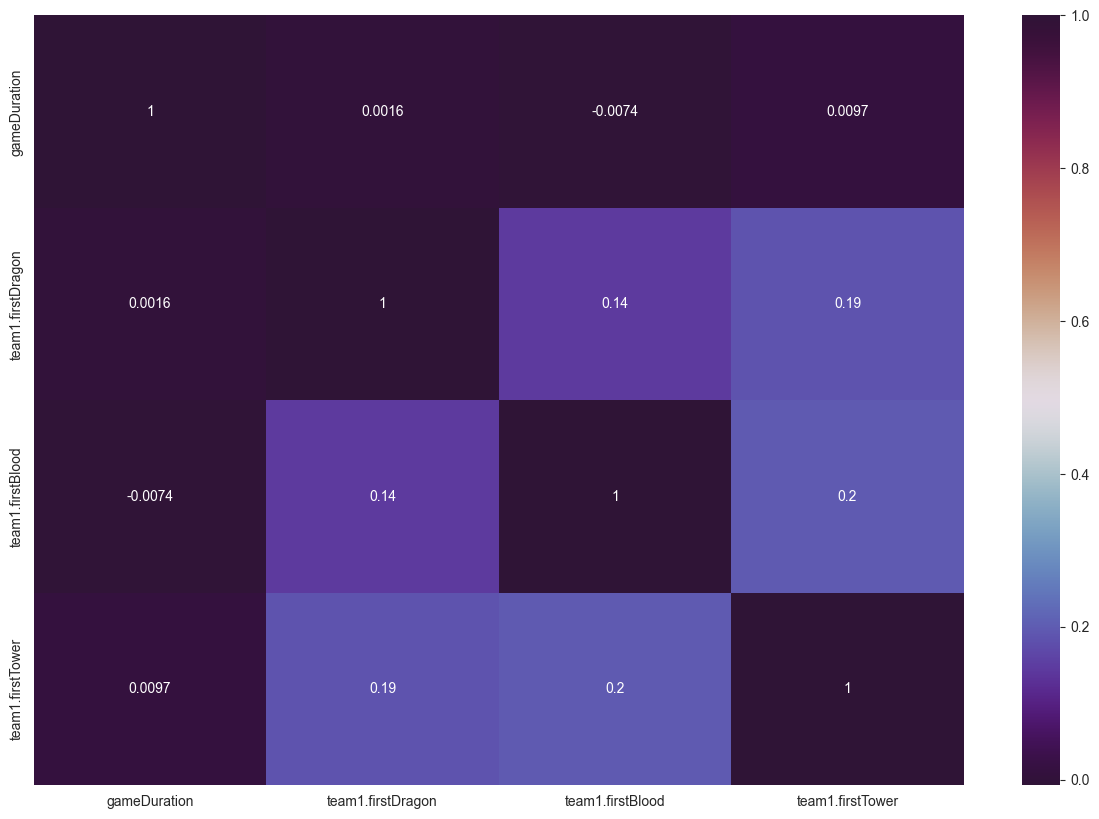

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='Greens')
plt.show()

## Remove multicolinearities logically

In [126]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

In [127]:
### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

## gameDuration did not have an effect

The confusion matrix for your predictions is:
[[4448 1645]
 [2020 4788]] 

The accuracy of your model is: 0.7159134950779009')
The recall of your model is: 0.7032902467685076')
The precision of your model is: 0.7442872687704026')
The F1 score of your model is: 0.7232082169020467')


## 4 features - 78.93% 

In [128]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [129]:
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [130]:
mod_cols = ['team1.kills', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

In [131]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

In [132]:
### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

## sum of kills added 8% to the accuracy!
## But it still doesn't seem fair to predict solely on difference in kills? Should we penalise by time?

The confusion matrix for your predictions is:
[[4969 1198]
 [1499 5235]] 

The accuracy of your model is: 0.7909464382606')
The recall of your model is: 0.7773982773982774')
The precision of your model is: 0.8137727343385668')
The F1 score of your model is: 0.7951697425381636')


## 4 features with kills diff - 95.48%

In [133]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [134]:
mod_cols = ['killDiff', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

In [135]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

In [136]:
### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

## kills diff added 26% to accuracy!

The confusion matrix for your predictions is:
[[6171  291]
 [ 297 6142]] 

The accuracy of your model is: 0.9544221378187737')
The recall of your model is: 0.9538748252834292')
The precision of your model is: 0.9547644955697187')
The F1 score of your model is: 0.9543194530764451')


In [137]:
X_train['y_actual'] = y_train
X_train

,killDiff,team1.firstDragon,team1.firstBlood,team1.firstTower,prob_lose,prob_win,y_pred,y_actual
9530,-8,True,True,False,0.968509,0.031491,0,0
4938,-16,False,False,True,0.997891,0.002109,0,0
16359,-13,False,True,True,0.995282,0.004718,0,0
15560,30,False,True,False,0.000013,0.999987,1,1
6690,14,False,True,True,0.004632,0.995368,1,1
...,...,...,...,...,...,...,...,...
13647,-3,False,False,False,0.814990,0.185010,0,0
5482,-12,True,True,False,0.993403,0.006597,0,0
879,8,False,False,True,0.033217,0.966783,1,1
16074,-11,False,True,False,0.993587,0.006413,0,0


In [138]:
X_train['killDiff'].astype('int')

9530     -8
4938    -16
16359   -13
15560    30
6690     14
         ..
13647    -3
5482    -12
879       8
16074   -11
7396     10
Name: killDiff, Length: 12901, dtype: int32

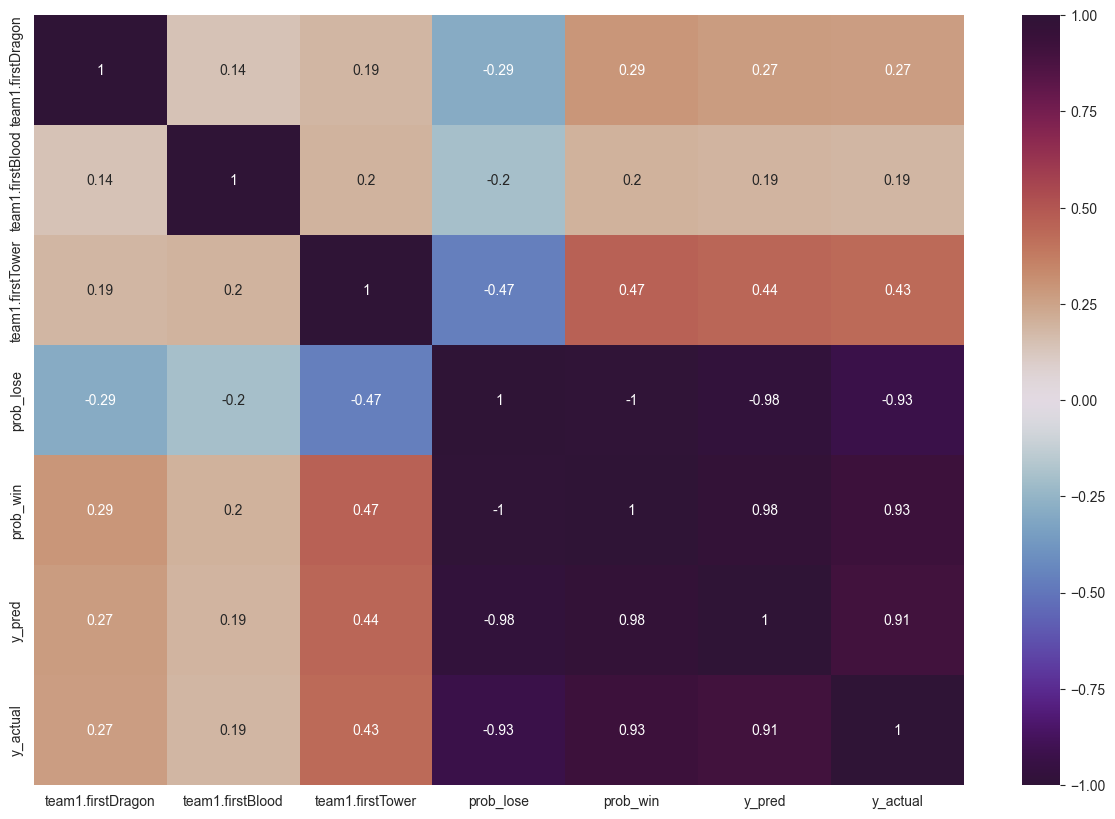

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='Greens')
plt.show()

## Remove multicolinearities logically

## 4 features with penalised kill diff - 78.08%

In [140]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [141]:
mod_cols = ['killAdj', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

In [142]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

### kills adjusted to take into account the game duration have brought accuracy down to 78% - but this may be more robust than just kill difference
### kills adjusted is a much more logical approach


The confusion matrix for your predictions is:
[[4981 1340]
 [1487 5093]] 

The accuracy of your model is: 0.7808697000232541')
The recall of your model is: 0.7740121580547112')
The precision of your model is: 0.7916990517643401')
The F1 score of your model is: 0.7827557058326289')


## Including all penalised metrics - 88.10%

In [202]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj'],
      dtype='object')

In [203]:
mod_cols = ['killAdj', 'deathAdj', 'assistAdj', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]

In [145]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

### kills adjusted to take into account the game duration have brought accuracy down to 78% - but this may be more robust than just kill difference
### kills adjusted is a much more logical approach

The confusion matrix for your predictions is:
[[5703  759]
 [ 765 5674]] 

The accuracy of your model is: 0.881869622509883')
The recall of your model is: 0.8811927317906507')
The precision of your model is: 0.8820146121560702')
The F1 score of your model is: 0.8816034804226228')


In [146]:
X_train['y_actual'] = y_train
X_train

,killAdj,deathAdj,assistAdj,team1.firstDragon,team1.firstBlood,team1.firstTower,prob_lose,prob_win,y_pred,y_actual
9530,9.9936,10.0064,9.9872,True,True,False,0.712434,0.287566,0,0
4938,9.991247,10.0093,9.983042,False,False,True,0.699115,0.300885,0,0
16359,9.993394,10.006606,9.996951,False,True,True,0.500248,0.499752,0,0
15560,10.016181,9.983819,10.047465,False,True,False,0.177753,0.822247,1,1
6690,10.011935,9.988065,10.014493,False,True,True,0.196627,0.803373,1,1
...,...,...,...,...,...,...,...,...,...,...
13647,9.998337,10.001663,9.998337,False,False,False,0.770535,0.229465,0,0
5482,9.992042,10.007294,9.993369,True,True,False,0.677279,0.322721,0,0
879,10.004044,9.995956,10.012133,False,False,True,0.322752,0.677248,1,1
16074,9.994385,10.005615,9.986728,False,True,False,0.823807,0.176193,0,0


In [205]:
X_train['killAdj'] = X_train['killAdj'].astype('int64')
X_train['deathAdj'] = X_train['deathAdj'].astype('int64')
X_train['assistAdj'] = X_train['assistAdj'].astype('int64')

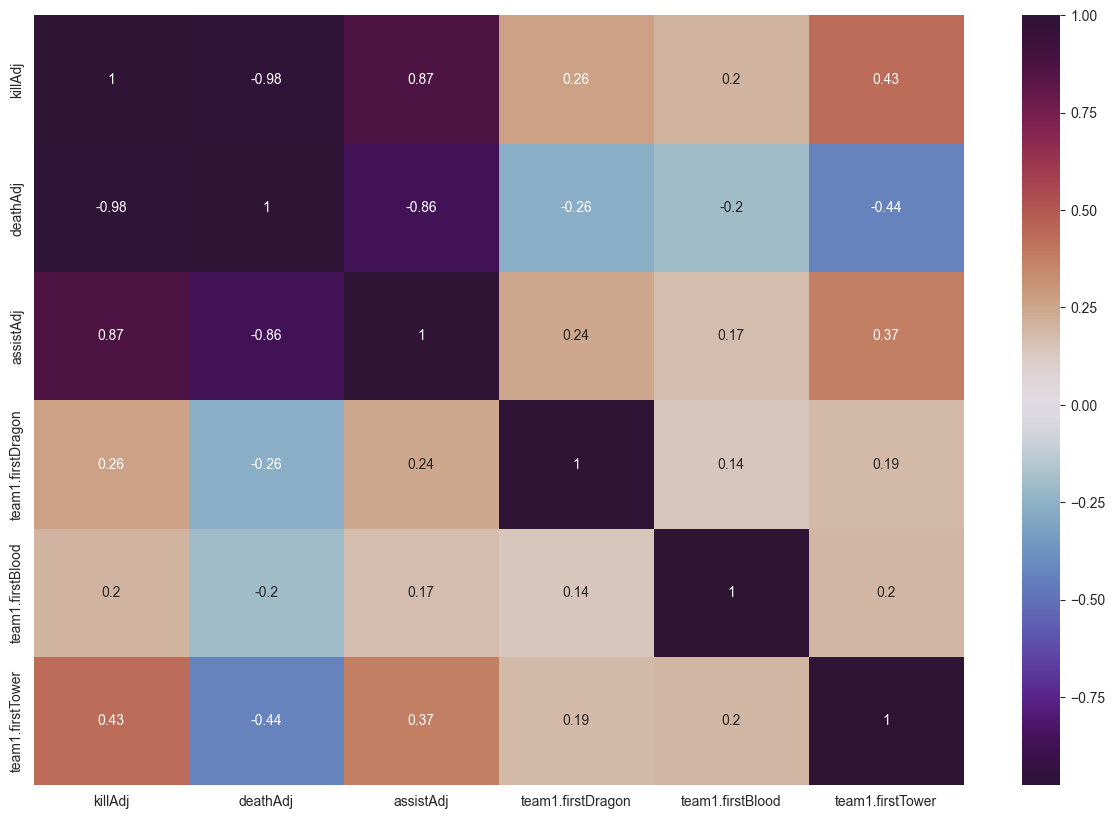

In [206]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='Greens')
plt.show()


## Only include kill metrics with herald instead of tower - 95.36%

Herald is a major contested objective as well as a great tool to use against towers so this covers more dimensions of the game than just tower

In [355]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj', 'towerAdj'],
      dtype

In [356]:
mod_cols = ['killAdj', 'team1.firstBlood', 'team1.firstDragon', 'team1.firstRiftHerald' ]
X_train = X_train[mod_cols]
X_train['killAdj'] = X_train['killAdj'].astype('int64')

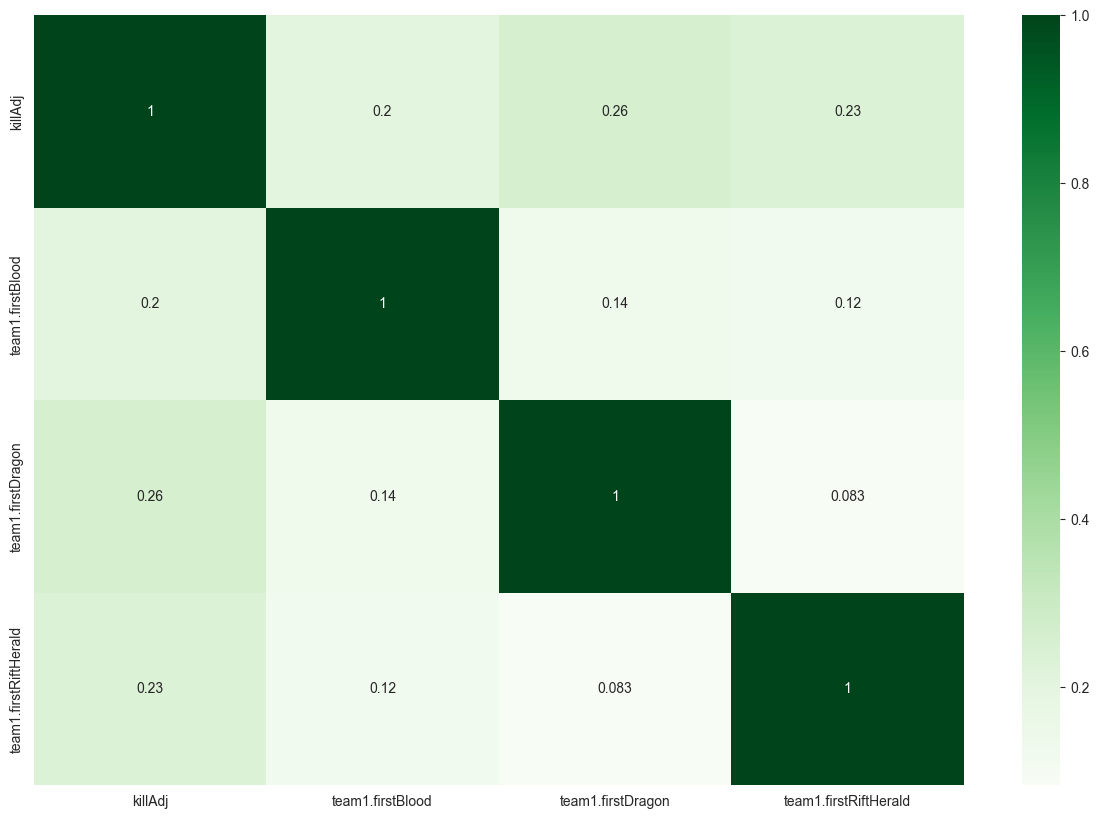

In [357]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='Greens')
plt.show()

## Multicolinearity too high!

In [358]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_train[['prob_lose', 'prob_win']] = lr.predict_proba(X_train)

### Metrics for TRAINING DATA
X_train['y_pred'] = np.where(X_train['prob_win'] > 0.5, 1, 0)
get_results(y_train, X_train['y_pred'])

### Key here is including other metrics 

The confusion matrix for your predictions is:
[[6129  262]
 [ 341 6258]] 

The accuracy of your model is: 0.9535796766743649')
The recall of your model is: 0.9483255038642219')
The precision of your model is: 0.9598159509202454')
The F1 score of your model is: 0.9540361308026527')


In [299]:
X_train['y_actual'] = y_train
X_train

,killAdj,team1.firstBlood,team1.firstDragon,team1.firstRiftHerald,prob_lose,prob_win,y_pred,y_actual
12644,10,False,True,False,0.047305,0.952695,1,0
12180,9,False,False,True,0.961309,0.038691,0,0
897,10,True,False,False,0.094526,0.905474,1,1
9976,9,True,False,False,0.974200,0.025800,0,0
551,10,True,False,True,0.063329,0.936671,1,1
...,...,...,...,...,...,...,...,...
13554,9,False,False,True,0.961309,0.038691,0,0
5448,10,False,False,True,0.064277,0.935723,1,1
874,9,False,False,False,0.974596,0.025404,0,0
15965,10,False,False,False,0.095893,0.904107,1,1


# Random Forest

## All feats 99.9%

In [353]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [148]:
## use the bagging classifier
bag = BaggingClassifier(base_estimator=RandomForestClassifier())

##
bag.fit(X_train, y_train)
##
bag.score(X_test, y_test)

0.9916305021698698

In [149]:
rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
et_score = cross_val_score(et, X_train, y_train, cv=5)

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored [0.99108873 0.99069767 0.98837209 0.99224806 0.98953488]
Extra Random scored [0.99341341 0.99302326 0.9875969  0.99379845 0.99069767]


In [150]:
# ##
# rf = RandomForestClassifier()

# rf_params = {
#     'n_estimators': [140, 150, 160, 165],
#     'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
# }

# gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

0.990388347764973


{'max_depth': 11, 'n_estimators': 165}

In [151]:
gs.score(X_train, y_train)

0.999844973257887

In [354]:
predictions = pd.DataFrame(index=X_train.index)
# random forest of 100 trees
for i in range(100):
    new_x = X_train.sample(n = X_train.shape[0],replace = True)

    new_y = y_train[new_x.index]

    tree = RandomForestClassifier(n_estimators= 165, max_depth=11)
    tree.fit(new_x, new_y)
    predictions[f'Tree {i}'] = tree.predict(X_train)

predictions

KeyboardInterrupt: 

## 3 features 71.5% acc

In [152]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
mod_cols = ['team1.firstDragon', 'team1.firstRiftHerald', 'team1.firstTower']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

In [154]:
## use the bagging classifier
bag = BaggingClassifier(base_estimator=RandomForestClassifier())

##
bag.fit(X_train, y_train)
##
bag.score(X_test, y_test)

0.712957222566646

In [155]:
rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
et_score = cross_val_score(et, X_train, y_train, cv=5)

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored [0.72258814 0.72868217 0.70736434 0.71511628 0.70581395]
Extra Random scored [0.72258814 0.72868217 0.70736434 0.71511628 0.70581395]


In [156]:
# ## 
# rf = RandomForestClassifier()

# rf_params = {
#     'n_estimators': [140, 150, 160, 165],
#     'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
# }

# gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_

## Penalised metrics

In [307]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.columns

Index(['team1.firstBlood', 'team1.firstTower', 'team1.firstInhibitor',
       'team1.firstBaron', 'team1.firstDragon', 'team1.firstRiftHerald',
       'team1.towerKills', 'team1.inhibitorKills', 'team1.baronKills',
       'team1.dragonKills', 'team1.riftHeraldKills', 'team2.firstBlood',
       'team2.firstTower', 'team2.firstInhibitor', 'team2.firstBaron',
       'team2.firstDragon', 'team2.firstRiftHerald', 'team2.towerKills',
       'team2.inhibitorKills', 'team2.baronKills', 'team2.dragonKills',
       'team2.riftHeraldKills', 'gameDuration', 'team1.kills', 'team2.kills',
       'team1.deaths', 'team2.deaths', 'team1.assists', 'team2.assists',
       'team1.mlevel', 'team2.mlevel', 'team1.turrets', 'team2.turrets',
       'team1.inhibs', 'team2.inhibs', 'team1.cspm', 'team2.cspm', 'towerDiff',
       'inhibDiff', 'dragDiff', 'heraldDiff', 'baronDiff', 'killDiff',
       'deathsDiff', 'assistDiff', 'csDiff', 'killAdj', 'assistAdj',
       'deathAdj', 'csAdj', 'towerAdj'],
      dtype

In [308]:
mod_cols = ['killAdj', 'deathAdj', 'assistAdj', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

In [309]:
## use the bagging classifier
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier())

##
bag.fit(X_train, y_train)
##
bag.score(X_test, y_test)

0.9507389162561576

In [310]:
rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
et_score = cross_val_score(et, X_train, y_train, cv=5)

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored [0.95381062 0.95688992 0.95765974 0.9495766  0.94919169]
Extra Random scored [0.94726713 0.95265589 0.95381062 0.94688222 0.94611239]


In [ ]:
##
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [140, 150, 160, 165],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

## Rf on killAdj and firstHerald 

In [346]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [347]:
mod_cols = ['killAdj','team1.firstBlood','team1.firstDragon', 'team1.firstRiftHerald']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

In [348]:
## use the bagging classifier
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier())

##
bag.fit(X_train, y_train)
##
bag.score(X_test, y_test)

0.9424261083743842

In [ ]:
##
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [140, 150, 160, 165],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [350]:
predictions = pd.DataFrame(index=X_train.index)
# random forest of 100 trees
for i in range(100):
    new_x = X_train.sample(n = X_train.shape[0],replace = True)

    new_y = y_train[new_x.index]

    tree = RandomForestClassifier(n_estimators= 160, max_depth=5)
    tree.fit(new_x, new_y)
    predictions[f'Tree {i}'] = tree.predict(X_train)

predictions


,Tree 0,Tree 1,Tree 2,Tree 3,Tree 4,Tree 5,Tree 6,Tree 7,Tree 8,Tree 9,...,Tree 90,Tree 91,Tree 92,Tree 93,Tree 94,Tree 95,Tree 96,Tree 97,Tree 98,Tree 99
12644,0,0,0,1,1,1,1,1,0,1,...,1,0,1,0,0,1,1,0,0,0
12180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5448,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15965,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [351]:
predictions['sum'] = predictions.sum(axis='columns')
predictions['pred'] = predictions.mode(axis='columns')[0]
predictions['real'] = y_train
predictions

,Tree 0,Tree 1,Tree 2,Tree 3,Tree 4,Tree 5,Tree 6,Tree 7,Tree 8,Tree 9,...,Tree 93,Tree 94,Tree 95,Tree 96,Tree 97,Tree 98,Tree 99,sum,pred,real
12644,0,0,0,1,1,1,1,1,0,1,...,0,0,1,1,0,0,0,67,1,0
12180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5448,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15965,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1


In [352]:
apr(predictions['pred'], y_train)

Accuracy:0.9561200923787528
Precision:0.956428352255293
Recall:0.9561349693251534
F1:0.956281638288081


(0.9561200923787528, 0.956428352255293, 0.9561349693251534, 0.956281638288081)

# Using best models to predict on test

## Final logistic regression model

In [285]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [286]:
mod_cols = ['killAdj','team1.firstBlood','team1.firstDragon', 'team1.firstRiftHerald']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

In [287]:
### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

### Create columns on training data based on logistic regression model trained with training data
X_test[['prob_lose', 'prob_win']] = lr.predict_proba(X_test)

### Metrics for TRAINING DATA
X_test['y_pred'] = np.where(X_test['prob_win'] > 0.5, 1, 0)
get_results(y_test, X_test['y_pred'])

### kills adjusted to take into account the game duration have brought accuracy down to 78% - but this may be more robust than just kill difference
### kills adjusted is a much more logical approach

The confusion matrix for your predictions is:
[[1275  319]
 [ 413 1241]] 

The accuracy of your model is: 0.7746305418719212')
The recall of your model is: 0.7503022974607013')
The precision of your model is: 0.7955128205128205')
The F1 score of your model is: 0.7722464219041691')


In [288]:
X_test['y_actual'] = y_test
X_test

,killAdj,team1.firstBlood,team1.firstTower,team1.firstDragon,team1.firstRiftHerald,prob_lose,prob_win,y_pred,y_actual
16175,10.00176,True,True,True,True,0.199209,0.800791,1,1
8784,9.989034,True,True,False,False,0.482288,0.517712,1,0
9282,10.013657,True,True,True,True,0.144832,0.855168,1,1
1348,9.994512,True,True,False,False,0.438340,0.561660,1,0
484,9.998324,True,False,False,False,0.738618,0.261382,0,0
...,...,...,...,...,...,...,...,...,...
7339,10.004392,False,True,False,True,0.422175,0.577825,1,1
14613,9.9913,False,False,False,True,0.820408,0.179592,0,0
6143,10.008511,True,False,False,False,0.670313,0.329687,0,1
5148,9.993745,True,False,True,True,0.568974,0.431026,0,0


In [192]:
X_test.describe()

,prob_lose,prob_win,y_pred,y_actual
count,3226.000000,3226.000000,3226.000000,3226.000000
mean,0.506233,0.493767,0.496590,0.494420
std,0.290795,0.290795,0.500066,0.500046
min,0.022855,0.023858,0.000000,0.000000
25%,0.225489,0.203856,0.000000,0.000000
50%,0.503505,0.496495,0.000000,0.000000
75%,0.796144,0.774511,1.000000,1.000000
max,0.976142,0.977145,1.000000,1.000000


In [284]:
print('Mean Absolute Error:', metrics.mean_absolute_error(X_test['y_actual'], X_test['y_pred']))
print('Mean Squared Error:', metrics.mean_squared_error(X_test['y_actual'], X_test['y_pred']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_test['y_actual'], X_test['y_pred'])))

Mean Absolute Error: 0.22536945812807882
Mean Squared Error: 0.22536945812807882
Root Mean Squared Error: 0.4747309323480816


## Final Random Forest model

In [314]:
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [315]:
mod_cols = ['killAdj', 'team1.firstBlood', 'team1.firstDragon', 'team1.firstRiftHerald' ]
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

In [316]:
##
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [140, 150, 160, 165],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9546574287913782


{'max_depth': 6, 'n_estimators': 165}

In [319]:
rf = RandomForestClassifier(n_estimators= 165, max_depth=6)

In [320]:
predictions = pd.DataFrame(index=X_test.index)
# random forest of 100 trees
for i in range(100):
    new_x = X_train.sample(n = X_train.shape[0],replace = True)

    new_y = y_train[new_x.index]

    tree = rf
    tree.fit(new_x, new_y)
    predictions[f'Tree {i}'] = tree.predict(X_test)

predictions

,Tree 0,Tree 1,Tree 2,Tree 3,Tree 4,Tree 5,Tree 6,Tree 7,Tree 8,Tree 9,...,Tree 90,Tree 91,Tree 92,Tree 93,Tree 94,Tree 95,Tree 96,Tree 97,Tree 98,Tree 99
16175,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
14613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6143,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
predictions['sum'] = predictions.sum(axis='columns')
predictions['pred'] = predictions.mode(axis='columns')[0]
predictions['real'] = y_test
predictions

,Tree 0,Tree 1,Tree 2,Tree 3,Tree 4,Tree 5,Tree 6,Tree 7,Tree 8,Tree 9,...,Tree 93,Tree 94,Tree 95,Tree 96,Tree 97,Tree 98,Tree 99,sum,pred,real
16175,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
8784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
1348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
14613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6143,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,100,1,1
5148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
apr(predictions['pred'], y_test)

Accuracy:0.9501231527093597
Precision:0.9509677419354838
Recall:0.9448717948717948
F1:0.9479099678456592


(0.9501231527093597,
 0.9509677419354838,
 0.9448717948717948,
 0.9479099678456592)

In [324]:
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions['real'], predictions['pred']))
print('Mean Squared Error:', metrics.mean_squared_error(predictions['real'], predictions['pred']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions['real'], predictions['pred'])))

Mean Absolute Error: 0.049876847290640396
Mean Squared Error: 0.049876847290640396
Root Mean Squared Error: 0.2233312501434593


In [323]:
### Run it back
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Choose parameters
mod_cols = ['killAdj', 'deathAdj', 'assistAdj', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

### Create columns on training data based on logistic regression model trained with training data
rf = RandomForestClassifier(n_estimators = 165, max_depth = 6)
rf.fit(X_train, y_train)
X_test[['prob_lose', 'prob_win']] = rf.predict_proba(X_test)
X_test['y_actual'] = y_test
X_test['y_pred'] = np.where(X_test['prob_win'] > 0.5, 1, 0)
X_test

,killAdj,deathAdj,assistAdj,team1.firstDragon,team1.firstBlood,team1.firstTower,prob_lose,prob_win,y_actual,y_pred
16175,10.00176,9.99824,10.006452,True,True,True,0.119726,0.880274,1,1
8784,9.989034,10.010281,9.978067,False,True,True,0.995611,0.004389,0,0
9282,10.013657,9.986343,10.011381,True,True,True,0.001230,0.998770,1,1
1348,9.994512,10.005488,9.987377,False,True,True,0.978247,0.021753,0,0
484,9.998324,10.001676,9.996648,False,True,False,0.831076,0.168924,0,0
...,...,...,...,...,...,...,...,...,...,...
7339,10.004392,9.995608,10.011858,False,False,True,0.034963,0.965037,1,1
14613,9.9913,10.0087,10.007784,False,False,False,0.972978,0.027022,0,0
6143,10.008511,9.991489,10.014184,False,True,False,0.006319,0.993681,1,1
5148,9.993745,10.006255,9.983319,True,True,False,0.997900,0.002100,0,0


In [325]:
X_test.describe()

,prob_lose,prob_win,y_actual,y_pred
count,3248.000000,3248.000000,3248.000000,3248.000000
mean,0.520032,0.479968,0.480296,0.479064
std,0.465539,0.465539,0.499689,0.499638
min,0.000784,0.000694,0.000000,0.000000
25%,0.004901,0.003535,0.000000,0.000000
50%,0.659407,0.340593,0.000000,0.000000
75%,0.996465,0.995099,1.000000,1.000000
max,0.999306,0.999216,1.000000,1.000000


# User Input

### Uncomment below to start fresh: ~12 minutes to run

In [175]:
# # Get CSV files list from a folder
# path = r'C:\Users\Gian\Documents\Digital Futures\Capstone ideas\LoL'
# csv_files = glob.glob(path + "/*.csv")

# # Read each CSV file into DataFrame
# # This creates a list of dataframes
# df_list = (pd.read_csv(file) for file in csv_files)

# # Concatenate all DataFrames
# df   = pd.concat(df_list, ignore_index=True)

# df.shape

In [176]:
# def sweep_columns(df):

#     ''' Bringing it all together '''
#     df = key_cols(df)
#     df = bye_cols(df)
#     df = name_clean(df)

#     return df

# small_df = df.copy()
# small_df = sweep_columns(small_df)

In [177]:
# def everything(df):

#     ''' Combining all participant data into team data'''
#     df = score_totals(df)
#     df = avg_level(df)
#     df = total_objectives(df)
#     df = df.dropna()

#     ''' Calculate all differences in summed metrics '''
#     df = object_diff(df) ### did not seem realistic to predict based on total kills
#     df = score_diff(df)  ### we are comparing between 2 teams, so a difference should represent that comparison

#     ''' Test on kills '''

#     df = duration_pen(df)

#     ''' Remove remaining participant columns'''
#     regex = re.compile(r'p\d+')
#     ## if there is a match, then the list will contain it
#     keep_cols = [i for i in df.columns if not regex.match(i)]    
#     df = df[keep_cols]

#     ''' Map boolean values onto win and fail for winning'''
#     win_bool = {'Win': 1, 'Fail' : 0}
#     df['team1.win'] = df['team1.win'].map(win_bool)

#     ''' We only need to know if 1 team won to know if the other team won'''
#     df = df.drop(columns = 'team2.win')

#     return df

# clean_df = small_df.copy()
# clean_df = everything(clean_df)

## Fit the model before running the function

In [360]:
### Define your model parameters and target
X = clean_df.copy().drop(columns = 'team1.win')
y = clean_df['team1.win'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mod_cols = ['killAdj', 'deathAdj', 'assistAdj', 'team1.firstDragon', 'team1.firstBlood', 'team1.firstTower']
X_train = X_train[mod_cols]
X_test = X_test[mod_cols]

### Fit the logistic regression on the TRAINING data not the testing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [184]:
# rf = RandomForestClassifier(n_estimators = 150, max_depth = 5)
# rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

In [361]:
def should_i_surrender():

    ''' User input! Questions about objectives: '''

    first_blood = ''
    while True:
        first_blood = input("Did your team get first blood?")
        if first_blood.lower() == str('yes'):
            first_blood = True
            break
        elif first_blood.lower() == str('no'):
            first_blood = False
            break
        else:
            print(f'{first_blood} is not a valid answer. Please type yes or no.')
            continue

    first_tower = ''
    while True:
        first_tower = input("Did your team destroy the first tower?")
        if first_tower.lower() == str('yes'):
            first_tower = True
            break
        elif first_tower.lower() == str('no'):
            first_tower = False
            break
        else:
            print(f'{first_tower} is not a valid answer. Please type yes or no.')
            continue

    first_dragon = ''
    while True:
        first_dragon = input("Did your team destroy the first dragon?")
        if first_dragon.lower() == str('yes'):
            first_dragon = True
            break
        elif first_dragon.lower() == str('no'):
            first_dragon = False
            break
        else:
            print(f'{first_dragon} is not a valid answer. Please type yes or no.')
            continue

    ''' User input about the team scores '''

    duration = ''
    while True:
        try:
            duration = int(input("To the nearest minute, how long has your game lasted so far?")) * 60
            break
        except ValueError:
            print(f'Answer must be a proper integer! Please type the duration to its nearest minute in NUMBER form!')
            continue
    
    kill_diff = ''
    while True:
        try:
            kill_diff = int(input("What is the kill diff between your team and theirs? (HINT: your team's kills minus theirs)"))
            break
        except ValueError:
            print(f'Answer must be a proper integer (number)!')
            continue

    death_diff = ''
    while True:
        try:
            death_diff = int(input("What is the death diff between your team and theirs?"))
            break
        except ValueError:
            print(f'Answer must be a proper integer (number)!')
            continue

    assist_diff = ''
    while True:
        try:
            assist_diff = int(input("What is the assist diff between your team and theirs?"))
            break
        except ValueError:
            print(f'Answer must be a proper integer (number)!')
            continue

    kd = (kill_diff / duration) + 10
    dd = (death_diff / duration) + 10
    ad = (assist_diff / duration) + 10

    ''' Answer storage '''

    answers = {'killAdj': kd, 'deathAdj': dd, 'assistAdj':ad, 'team1.firstDragon':first_dragon, 'team1.firstBlood':first_blood, 'team1.first_Tower':first_tower}
    df = pd.DataFrame(answers , index = [0])

    ''' answer return '''

    df[['prob_lose', 'prob_win']] = lr.predict_proba(df)

    if df['prob_win'][0] > 0.5:
        print(f"Your chance of winning is still around {round((df['prob_win'][0] * 100),2)}%! Keep going! You got this", "\n")
        print("Rest assured, my model's tested accuracy is 77.5% ;)")
    else:
        print(f"Your chance of winning is currently ~{round((df['prob_win'][0] * 100),2)}%. A bit low, but it's your call now!", "\n")
        print("My accuracy at predicting games is 77.5%, but you still got that 22.5%!")
        print("And you are 1 in 8 billion :)")


## Should you surrender?

In [363]:
should_i_surrender()

Your chance of winning is currently ~19.71%. A bit low, but it's your call now! 

My accuracy at predicting games is 77.5%, but you still got that 22.5%!
And you are 1 in 8 billion :)
